# **Importing** **necessary** **libraries**

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Load** **Data**

In [199]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [200]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [201]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

**ID** **Handling**

In [202]:
train_ID = df_train["Id"]
test_ID = df_test["Id"]
df_train.drop("Id",axis = 1, inplace = True)
df_test.drop("Id",axis = 1, inplace = True)

In [203]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

**Target** **Variable**

In [204]:
df_total = pd.concat((df_train,df_test)).reset_index(drop = True)

In [205]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

**Handling Missing Values**

In [206]:
missing_data = df_total.isnull().sum().sort_values(ascending = False)
missing_percentage = (missing_data/len(df_total))*100

missing_df = pd.DataFrame({"Total":missing_data,"Percentage":missing_percentage})
missing = missing_df[missing_df["Total"]>0]
missing

Total  Percentage
PoolQC         2909   99.657417
MiscFeature    2814   96.402878
Alley          2721   93.216855
Fence          2348   80.438506
MasVnrType     1766   60.500171
SalePrice      1459   49.982871
FireplaceQu    1420   48.646797
LotFrontage     486   16.649538
GarageFinish    159    5.447071
GarageQual      159    5.447071
GarageCond      159    5.447071
GarageYrBlt     159    5.447071
GarageType      157    5.378554
BsmtCond         82    2.809181
BsmtExposure     82    2.809181
BsmtQual         81    2.774923
BsmtFinType2     80    2.740665
BsmtFinType1     79    2.706406
MasVnrArea       23    0.787941
MSZoning          4    0.137033
BsmtHalfBath      2    0.068517
Utilities         2    0.068517
BsmtFullBath      2    0.068517
Functional        2    0.068517
Exterior2nd       1    0.034258
Exterior1st       1    0.034258
GarageArea        1    0.034258
GarageCars        1    0.034258
SaleType          1    0.034258
KitchenQual       1    0.034258
BsmtFinSF1        1    0.034258
Electrical        1    0.034258
BsmtFinSF2        1    0.034258
BsmtUnfSF         1    0.034258
TotalBsmtSF       1    0.034258

Bar Plot

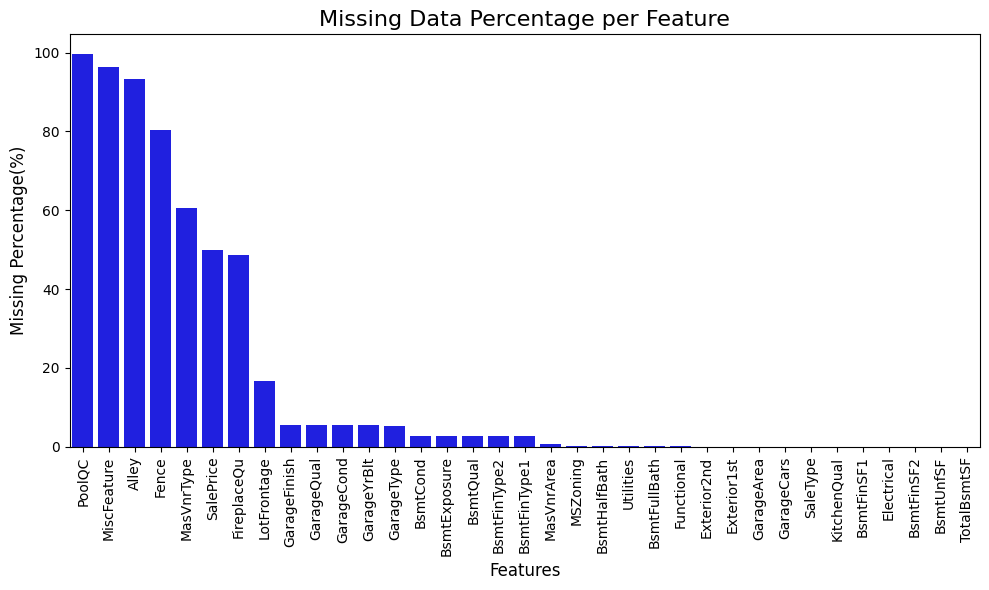

In [207]:
plt.figure(figsize=(10,6))
sns.barplot(x = missing.index, y = missing["Percentage"],color = "blue")
plt.title("Missing Data Percentage per Feature",fontsize = 16)
plt.xlabel("Features",fontsize = 12)
plt.ylabel("Missing Percentage(%)",fontsize = 12)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [208]:
def fill_missing_values(df,col_dict):
  for col, value in col_dict.items():
    df[col] = df[col].fillna(value)
  return df

In [209]:
fill_dict = {
    "PoolQC": df_total['PoolQC'].mode()[0], "MiscFeature": df_total['MiscFeature'].mode()[0], "Alley": df_total['Alley'].mode()[0], "Fence": df_total['Fence'].mode()[0],
    "FireplaceQu": df_total['FireplaceQu'].mode()[0], "MasVnrType": df_total['MasVnrType'].mode()[0], "MSZoning": df_total['MSZoning'].mode()[0],
    "Functional": df_total['Functional'].mode()[0], "Electrical": df_total['Electrical'].mode()[0],
    "KitchenQual": df_total['KitchenQual'].mode()[0], "Exterior1st": df_total['Exterior1st'].mode()[0],
    "Exterior2nd": df_total['Exterior2nd'].mode()[0], "SaleType": df_total['SaleType'].mode()[0],
    "MSSubClass": df_total['MSSubClass'].mode()[0], "SalePrice": df_total['SalePrice'].mode()[0]
}

df_total = fill_missing_values(df_total, fill_dict)

df_total['LotFrontage'] = df_total.groupby("Neighborhood")['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [210]:
df_total['LotFrontage'] = df_total.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [211]:
cols_none = ['GarageType',"GarageFinish",'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df_total[cols_none] = df_total[cols_none].apply(lambda x: x.fillna("None"))

In [212]:
cols_zero = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
df_total[cols_zero] = df_total[cols_zero].apply(lambda x: x.fillna(0))

In [213]:
df_total.drop(['Utilities'],axis = 1,inplace = True)

In [214]:
df_total['Functional'] = df_total['Functional'].fillna(df_total['Functional'].mode()[0])
df_total['Electrical'] = df_total['Electrical'].fillna(df_total['Electrical'].mode()[0])
df_total['KitchenQual'] = df_total['KitchenQual'].fillna(df_total['KitchenQual'].mode()[0])
df_total['Exterior1st'] = df_total['Exterior1st'].fillna(df_total['Exterior1st'].mode()[0])
df_total['Exterior2nd'] = df_total['Exterior2nd'].fillna(df_total['Exterior2nd'].mode()[0])
df_total['SaleType'] = df_total['SaleType'].fillna(df_total['SaleType'].mode()[0])
df_total["SalePrice"] = df_total["SalePrice"].fillna(df_total["SalePrice"].mode()[0])

**Feature Engineering**

In [215]:
df_total['TotalLivingArea'] = df_total['TotalBsmtSF'] + df_total['1stFlrSF'] + df_total['2ndFlrSF']
df_total['HouseAge'] = df_total['YrSold'] - df_total['YearBuilt']
df_total['RemodAge'] = df_total['YrSold'] - df_total['YearRemodAdd']
df_total['GardenArea'] = df_total['LotArea'] - df_total['TotalBsmtSF'] - df_total['GrLivArea']

In [216]:
df_total['MSSubClass'] = df_total["MSSubClass"].astype(str)
df_total['MoSold'] = df_total['MoSold'].astype(str)

In [217]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       2919 non-null   object 
 1   MSZoning         2919 non-null   object 
 2   LotFrontage      2919 non-null   float64
 3   LotArea          2919 non-null   int64  
 4   Street           2919 non-null   object 
 5   Alley            2919 non-null   object 
 6   LotShape         2919 non-null   object 
 7   LandContour      2919 non-null   object 
 8   LotConfig        2919 non-null   object 
 9   LandSlope        2919 non-null   object 
 10  Neighborhood     2919 non-null   object 
 11  Condition1       2919 non-null   object 
 12  Condition2       2919 non-null   object 
 13  BldgType         2919 non-null   object 
 14  HouseStyle       2919 non-null   object 
 15  OverallQual      2919 non-null   int64  
 16  OverallCond      2919 non-null   int64  
 17  YearBuilt     

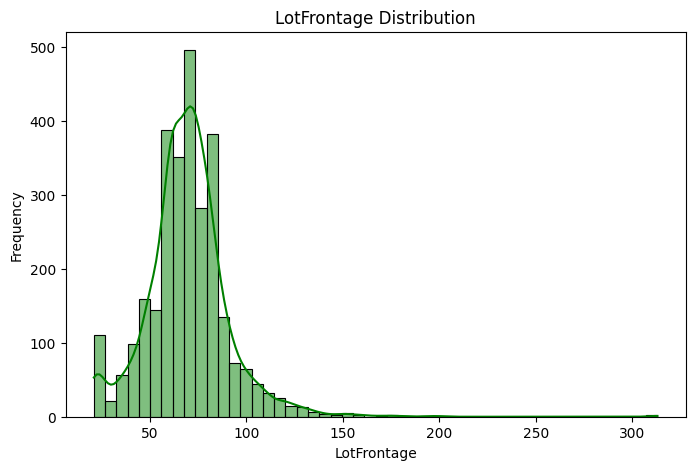

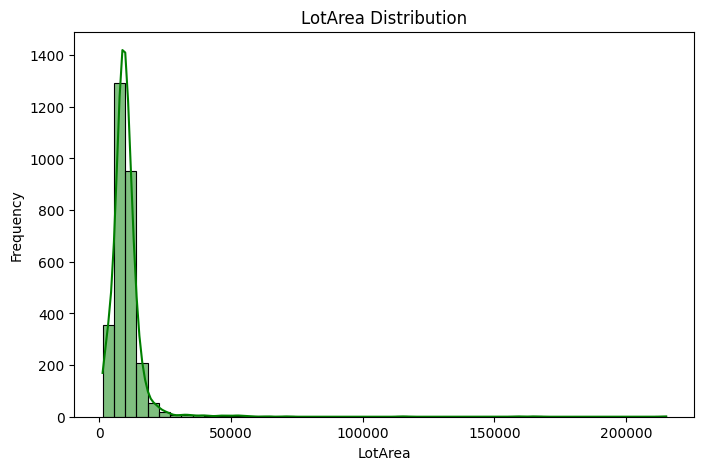

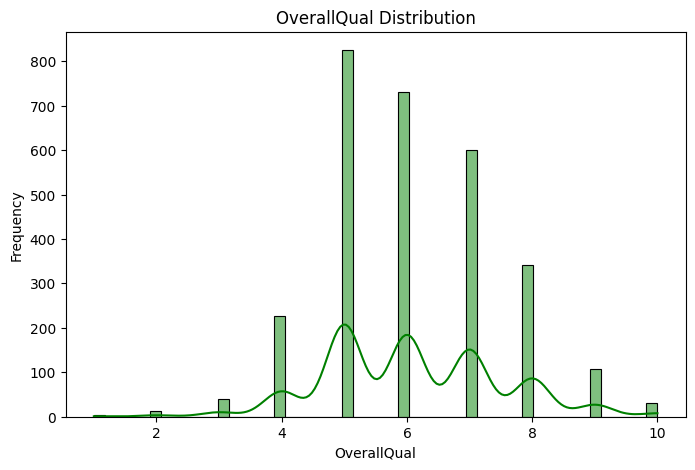

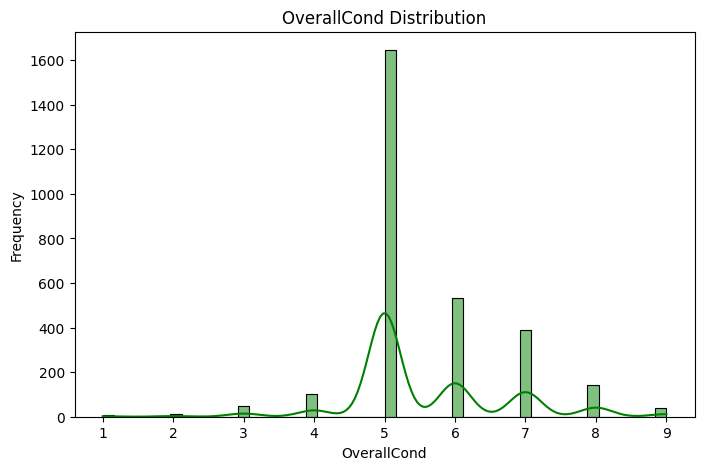

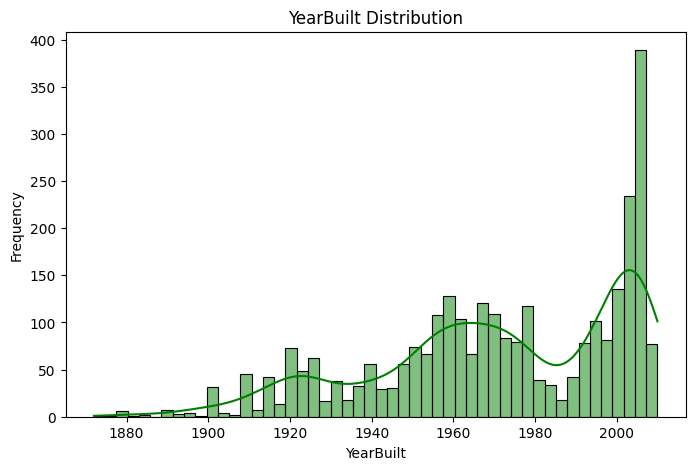

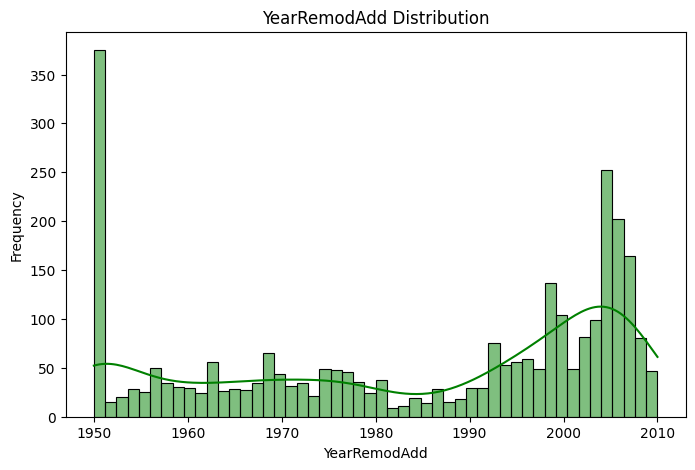

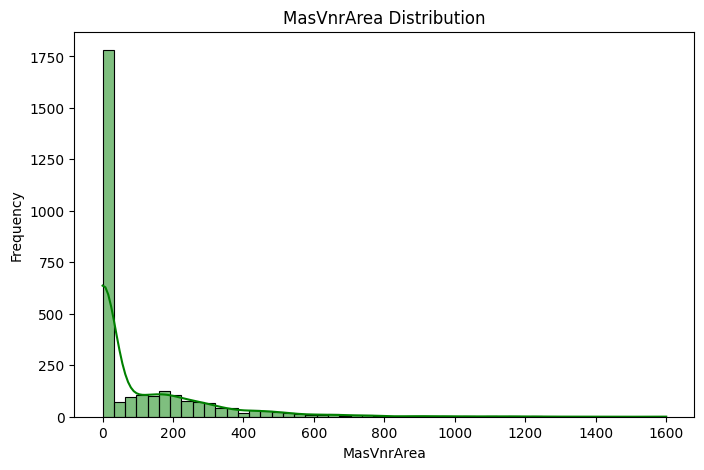

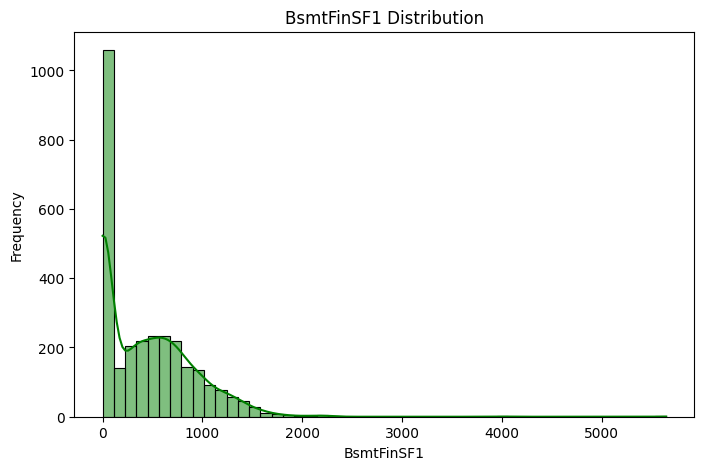

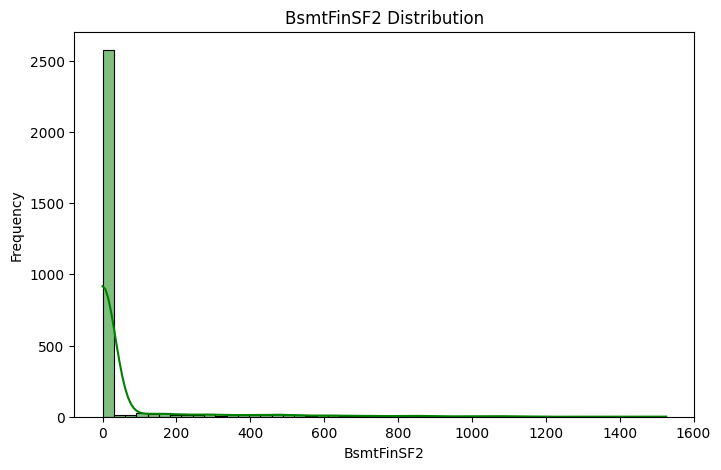

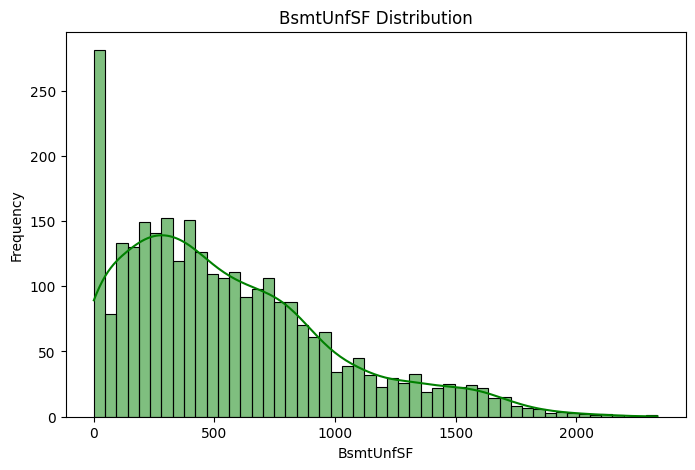

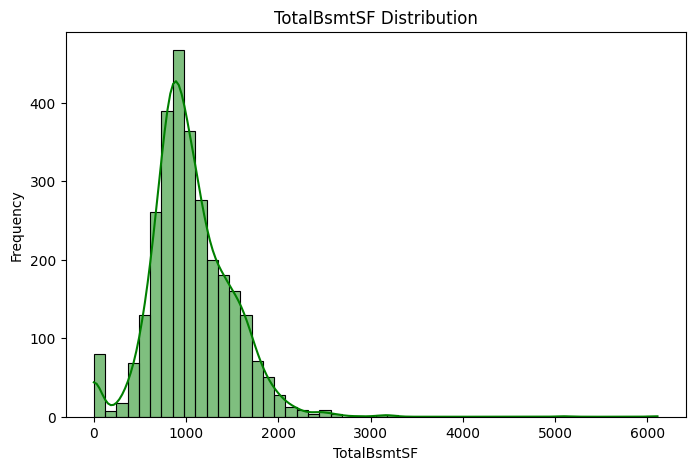

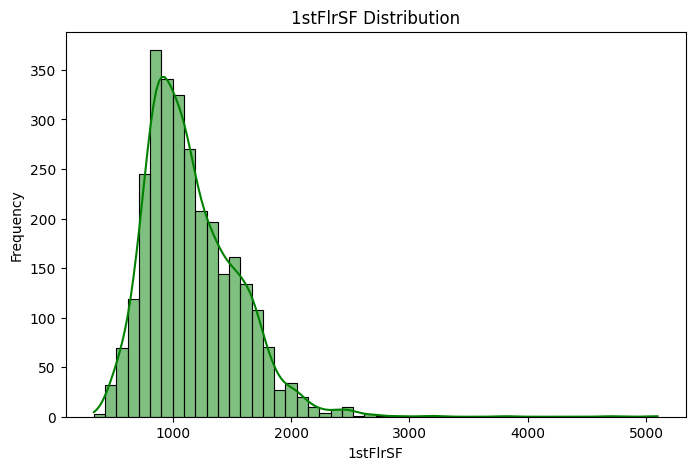

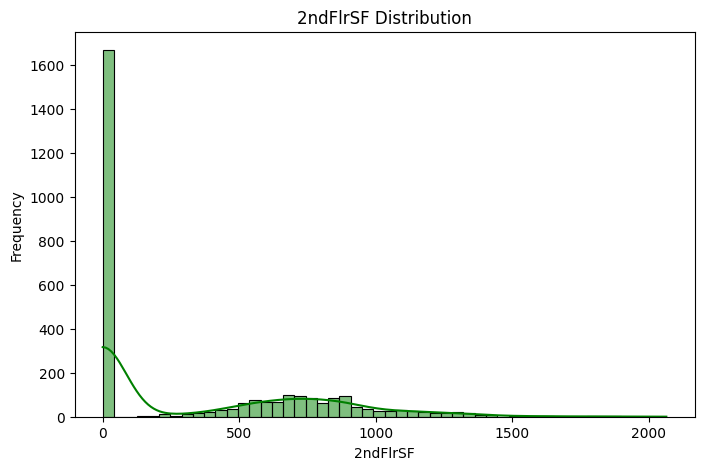

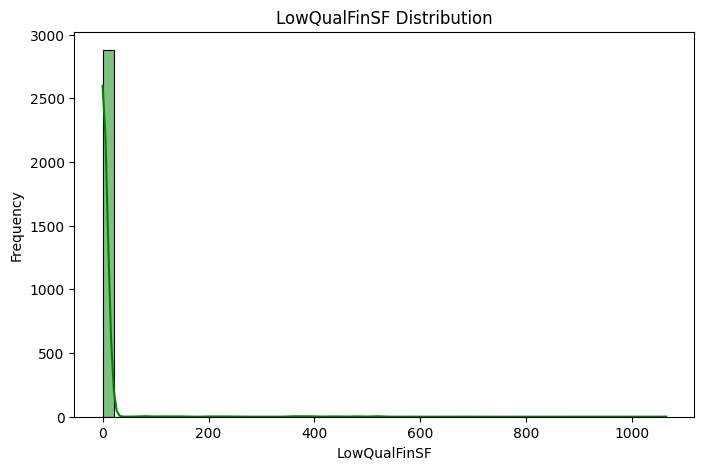

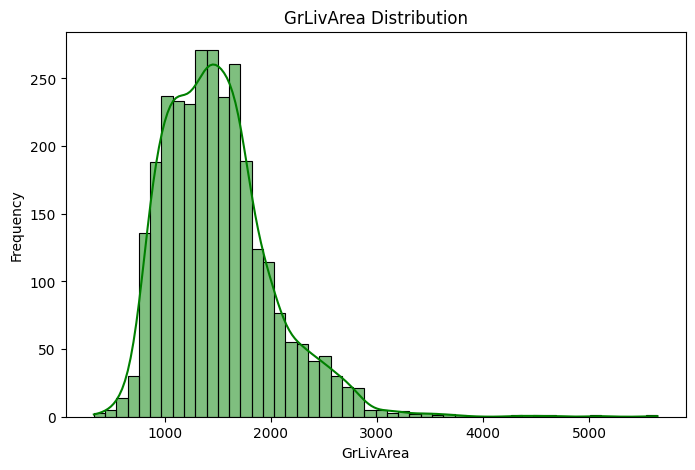

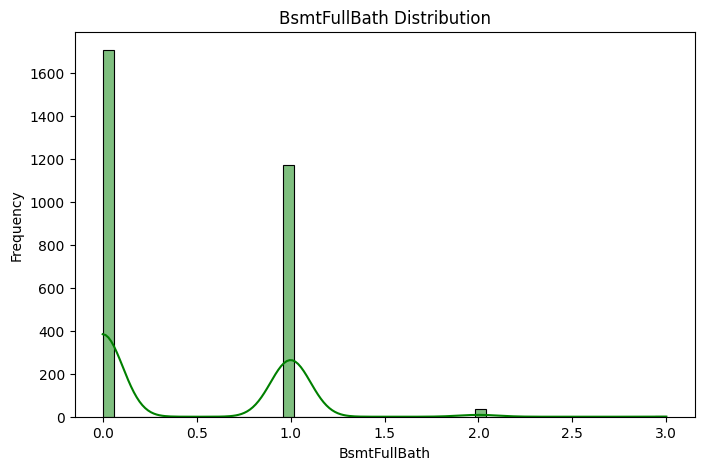

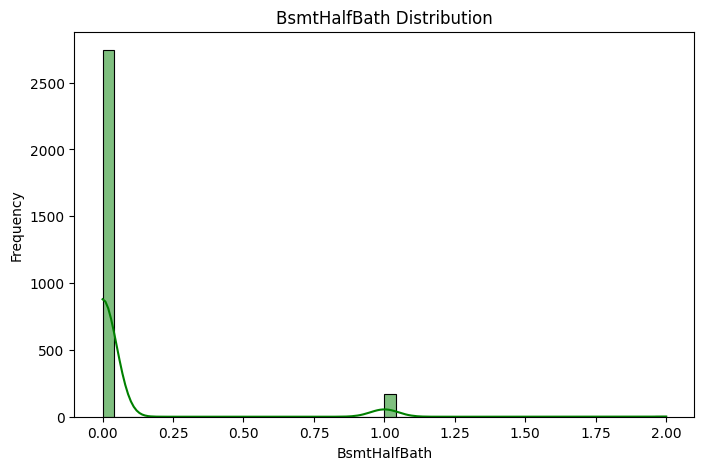

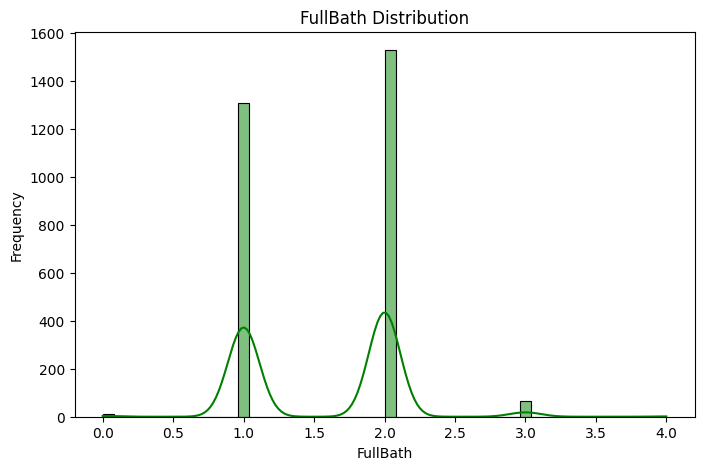

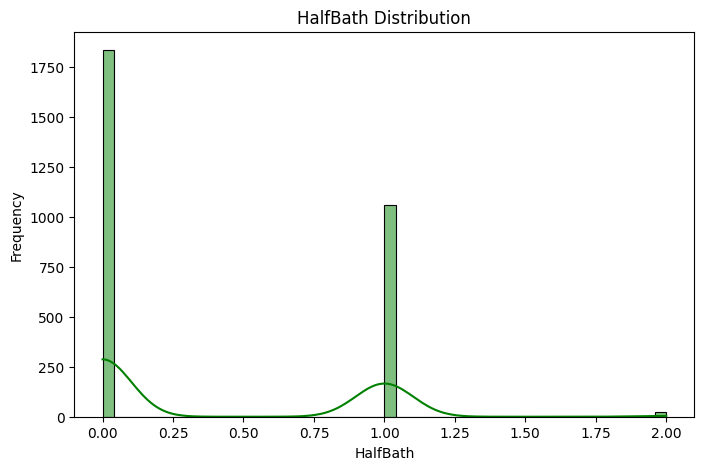

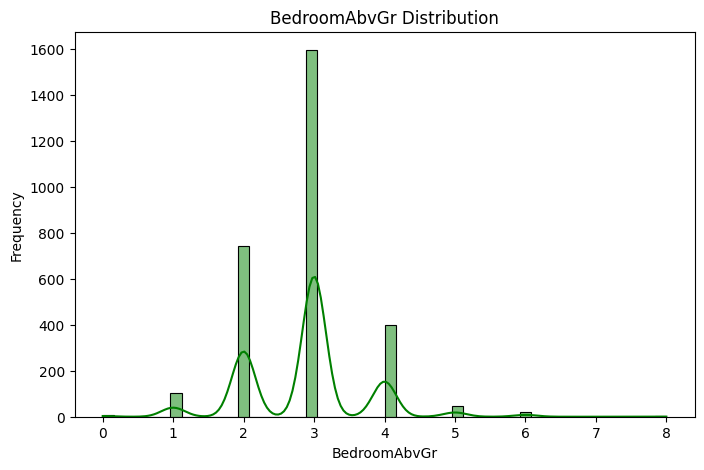

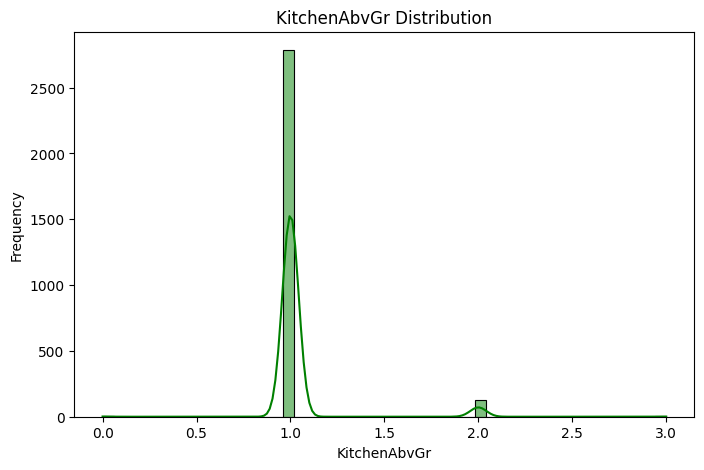

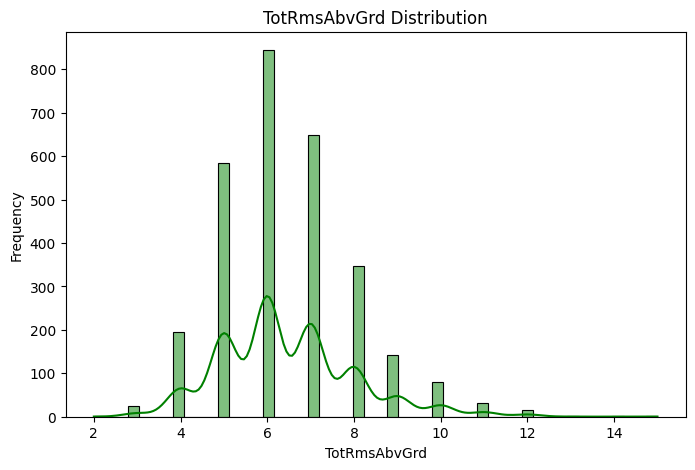

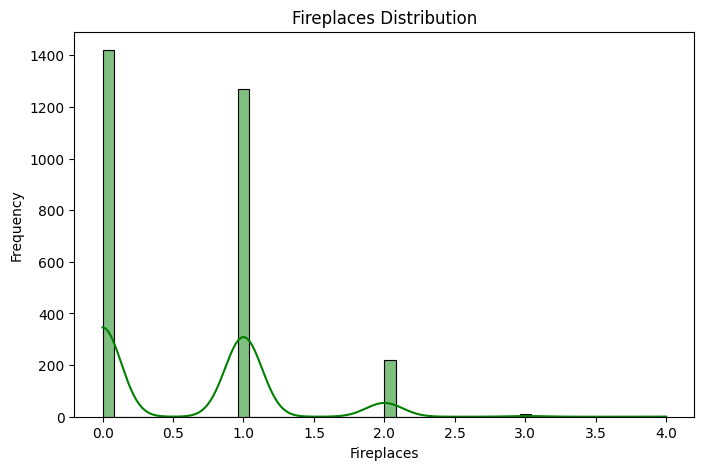

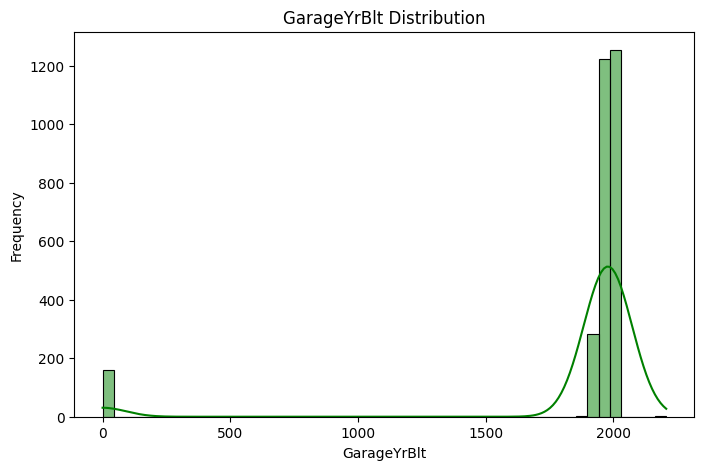

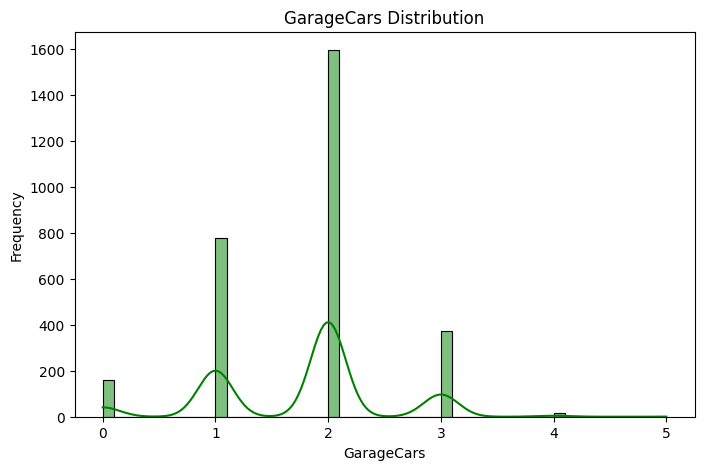

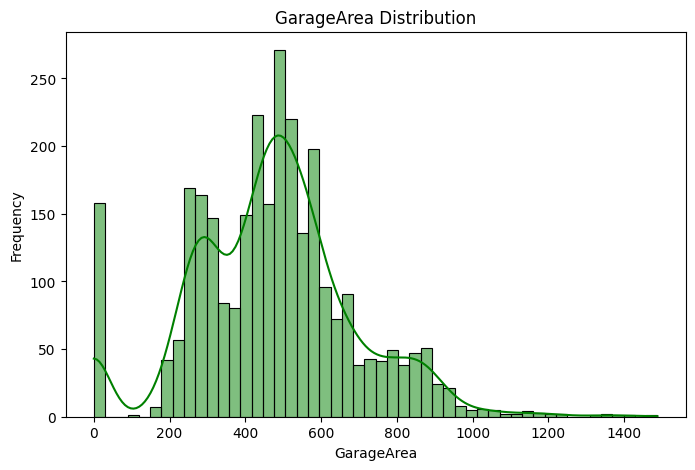

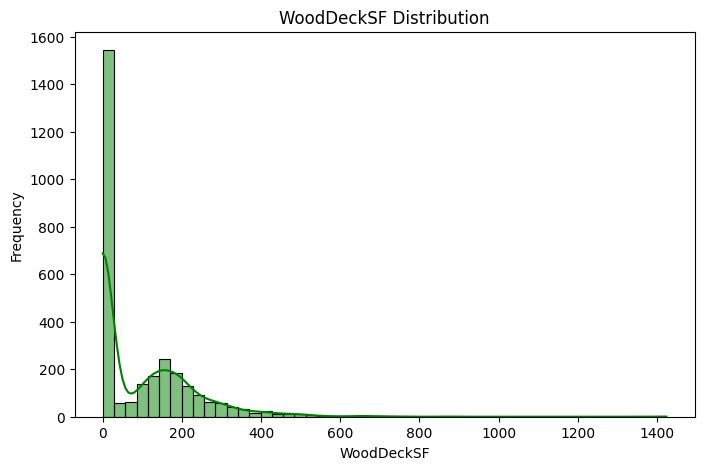

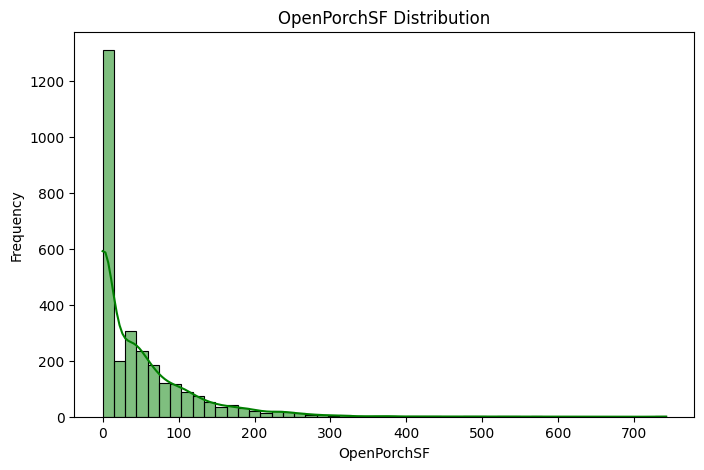

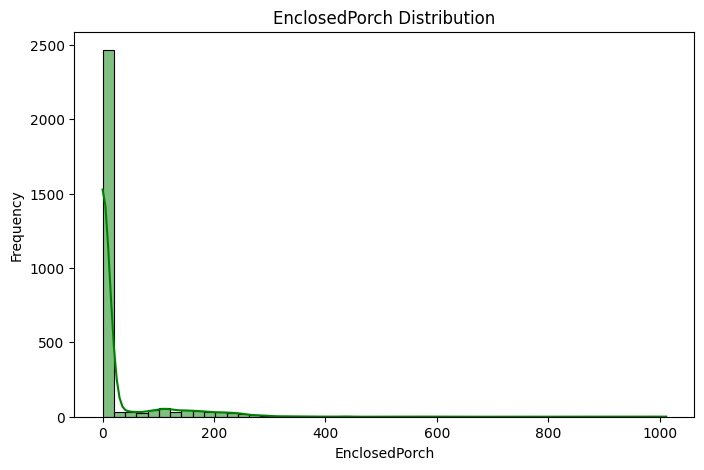

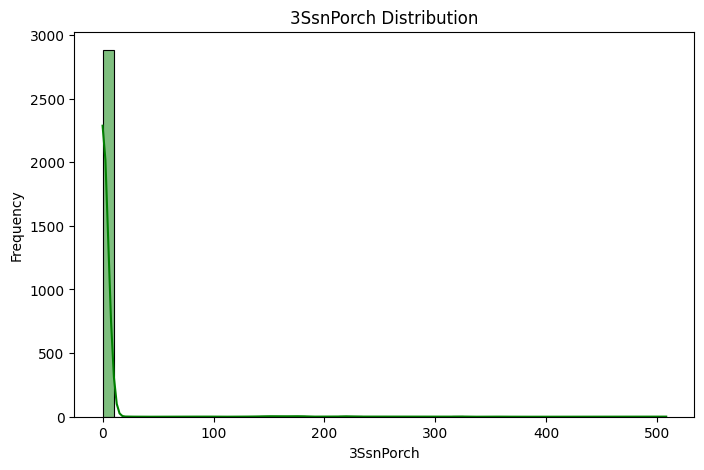

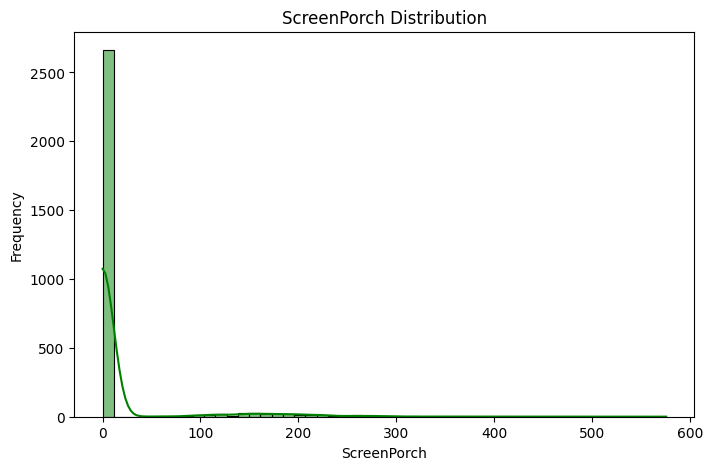

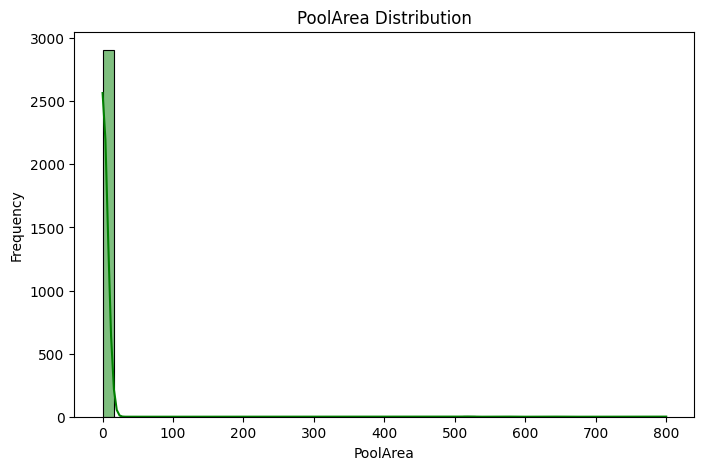

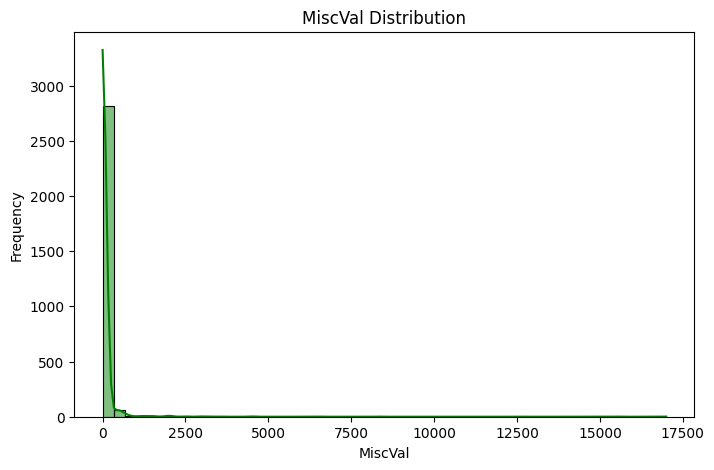

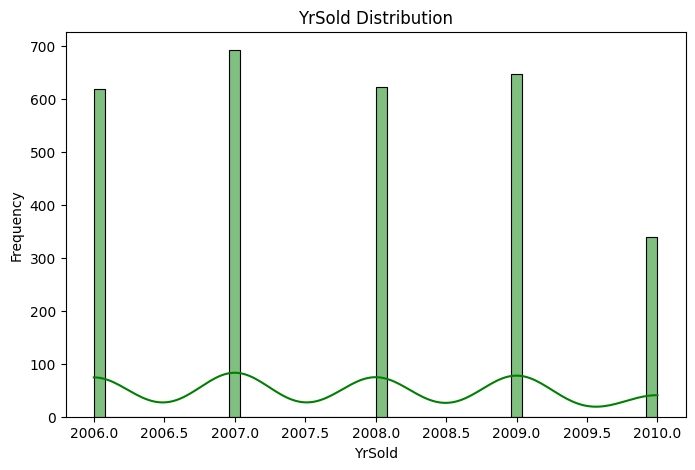

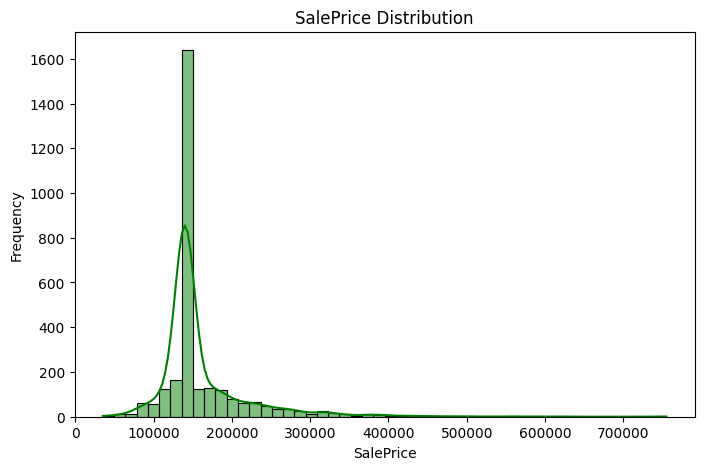

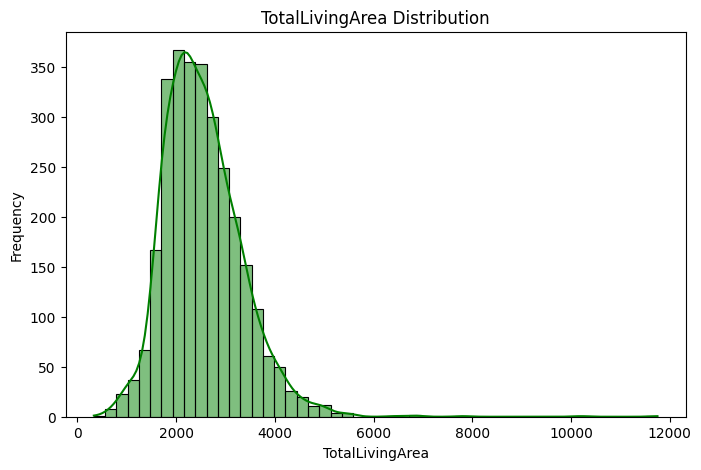

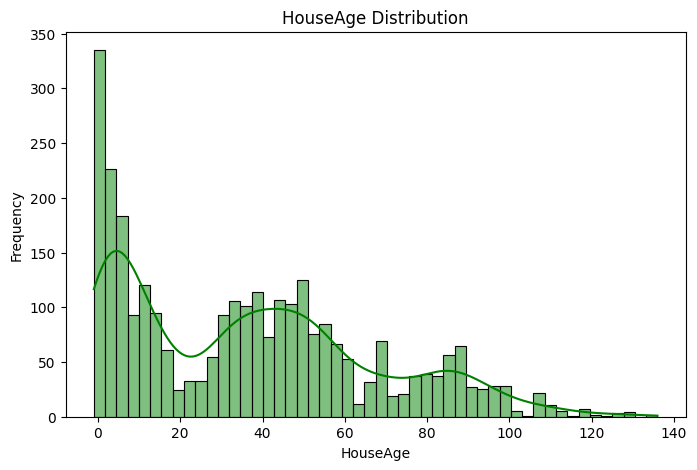

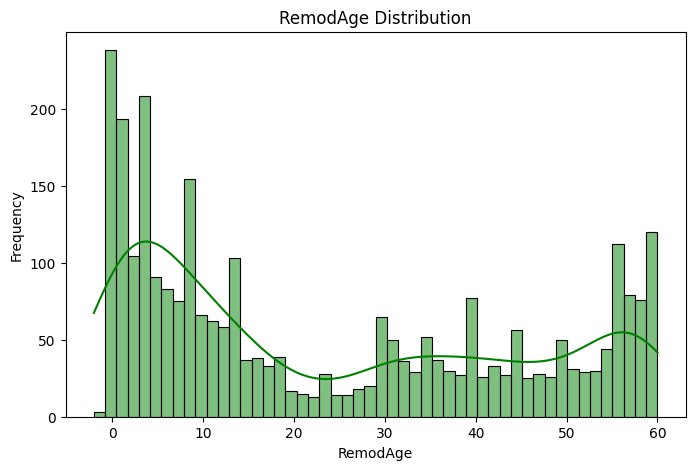

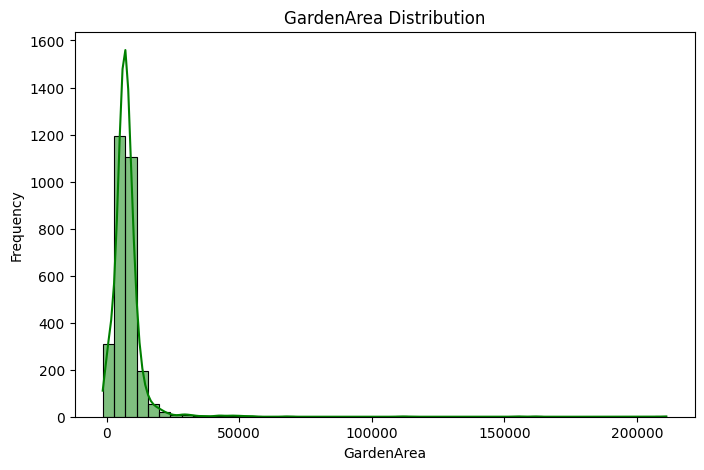

In [218]:
numerical_features = df_total.select_dtypes(include = ['int64','float64']).columns
for feature in numerical_features:
  plt.figure(figsize = (8,5))
  sns.histplot(df_total[feature],bins = 50, kde = True, color = "green")
  plt.title(f"{feature} Distribution")
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.show()

CountPlot

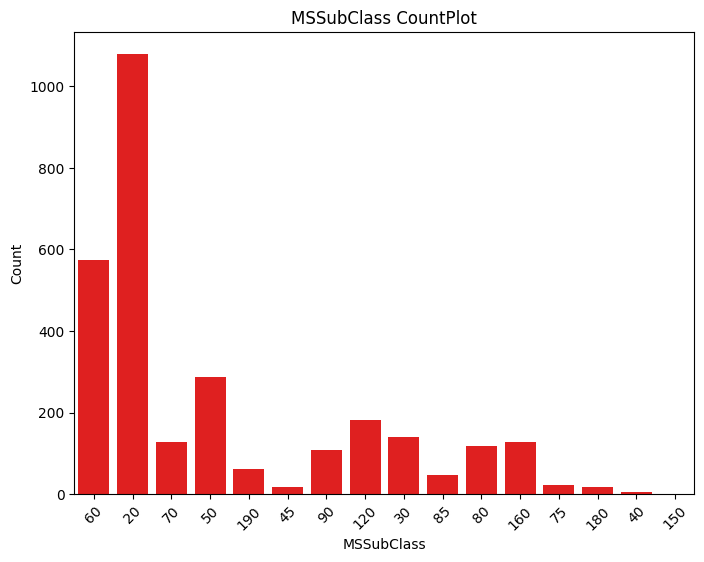

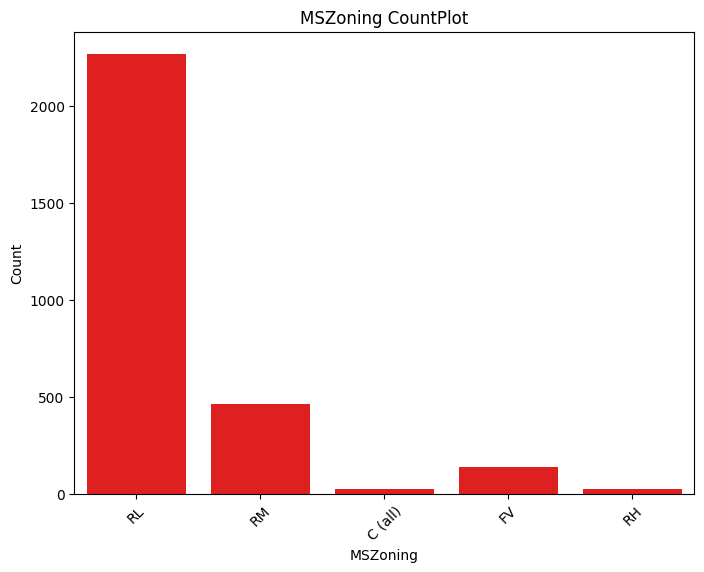

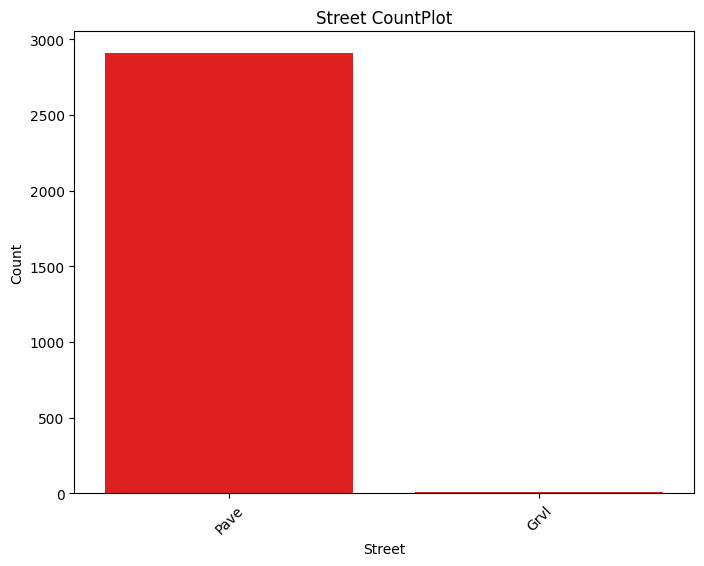

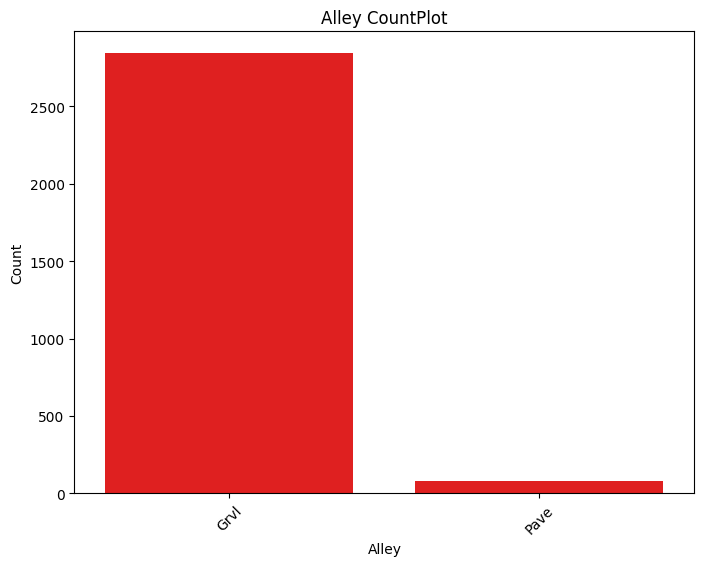

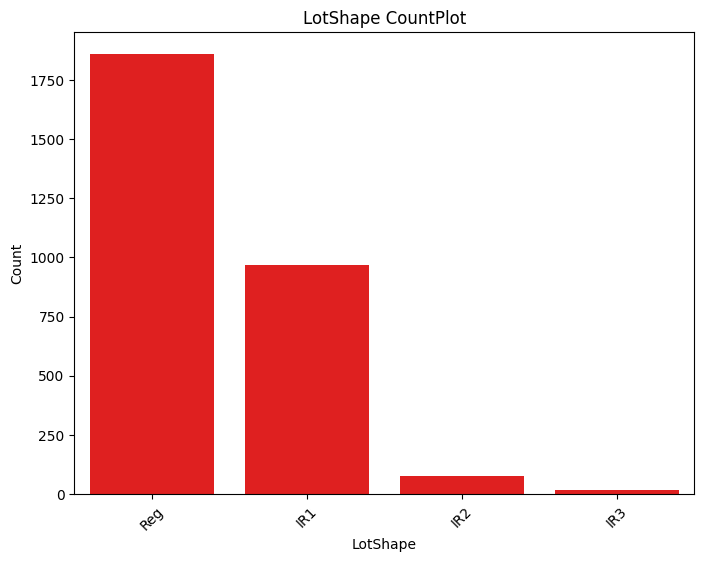

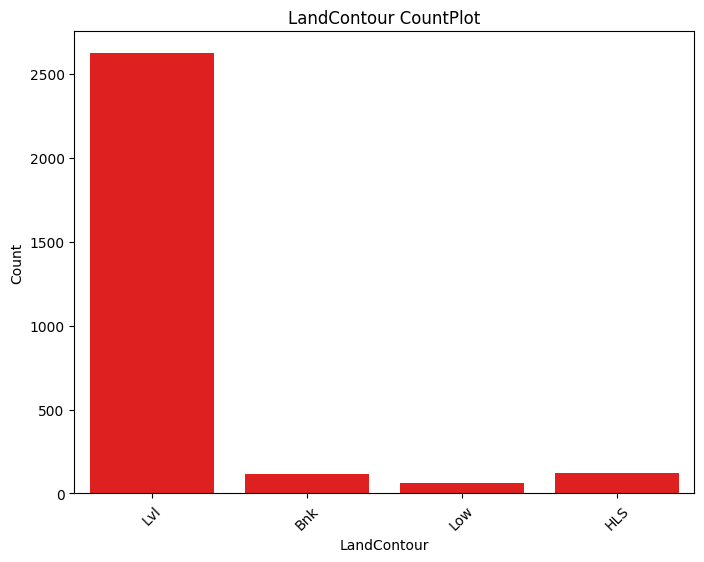

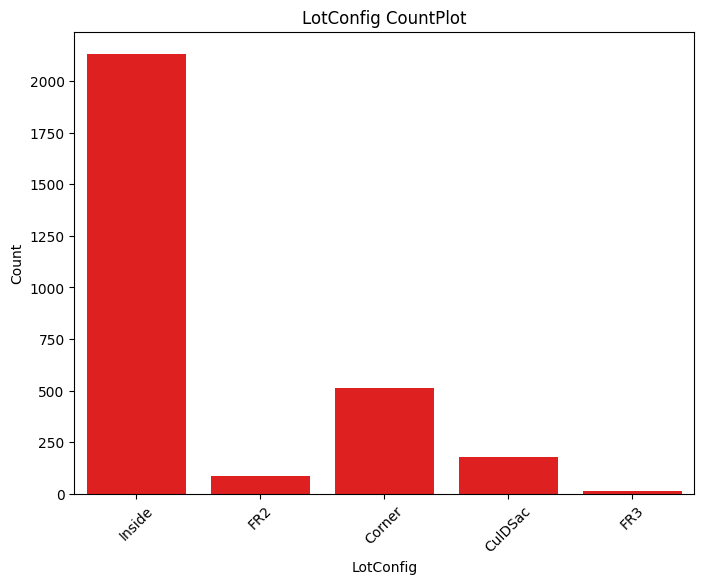

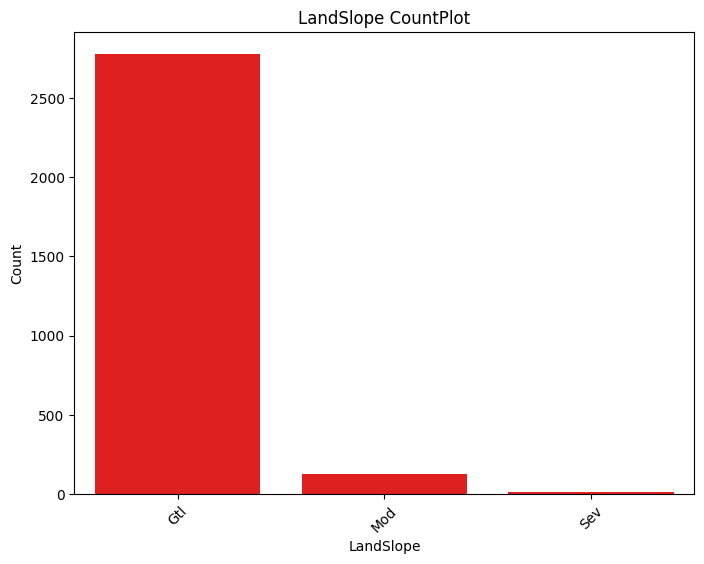

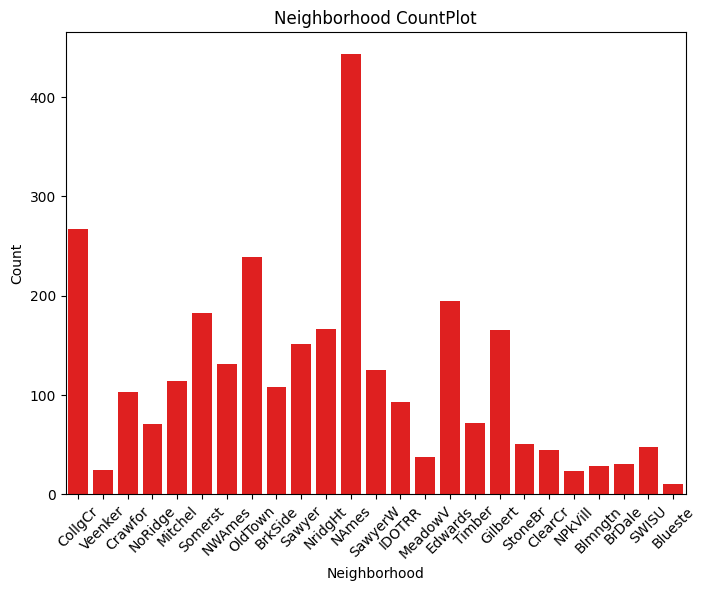

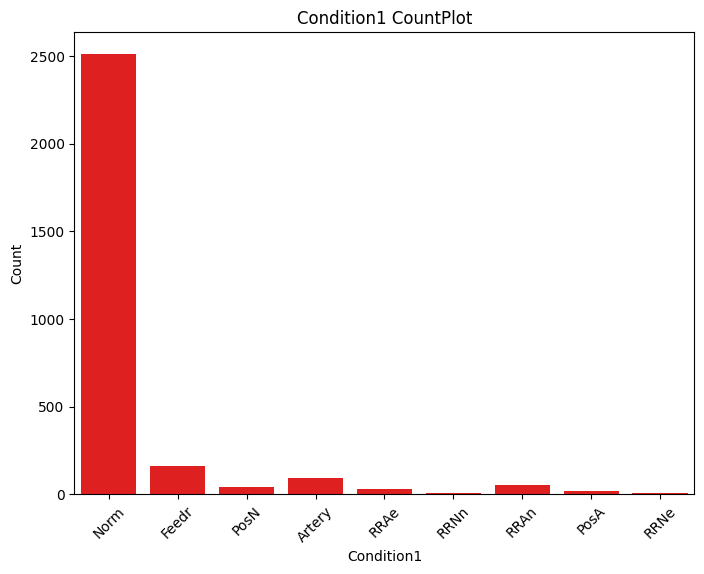

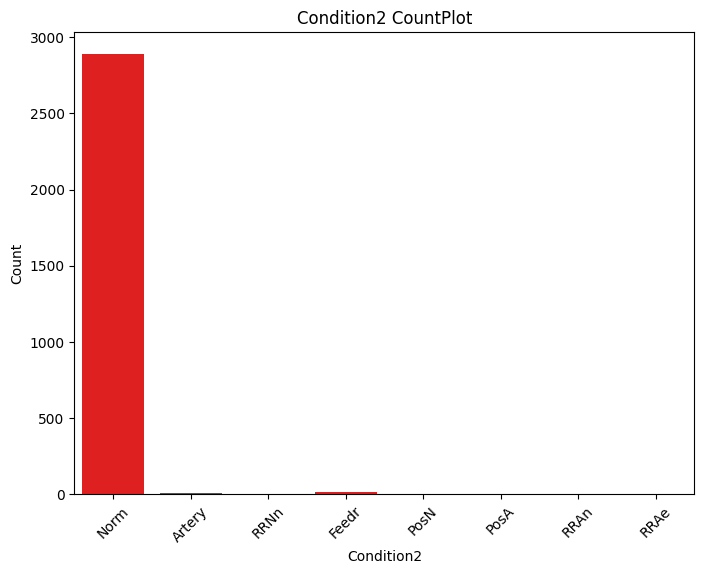

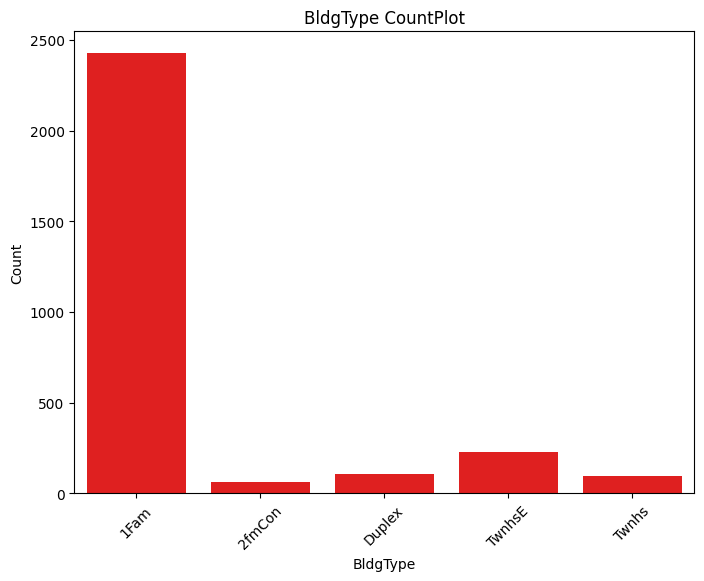

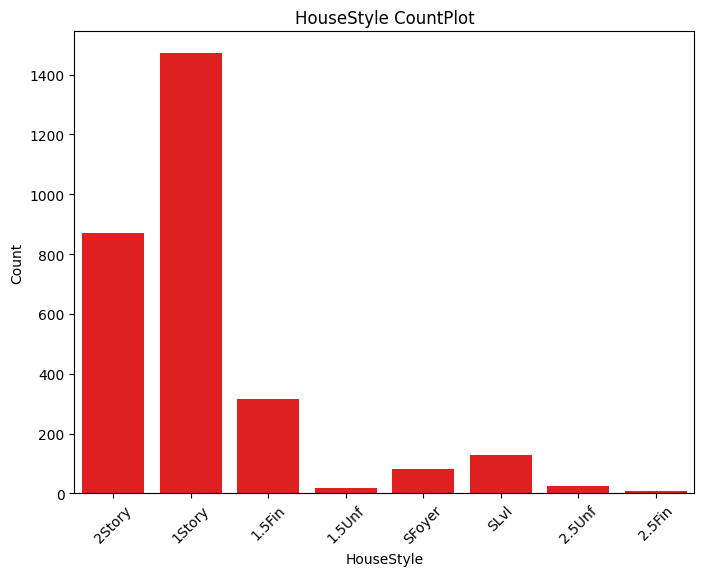

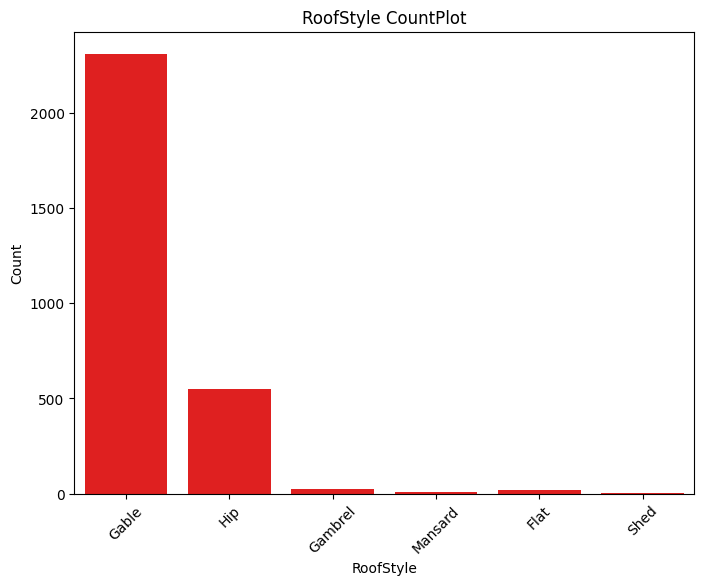

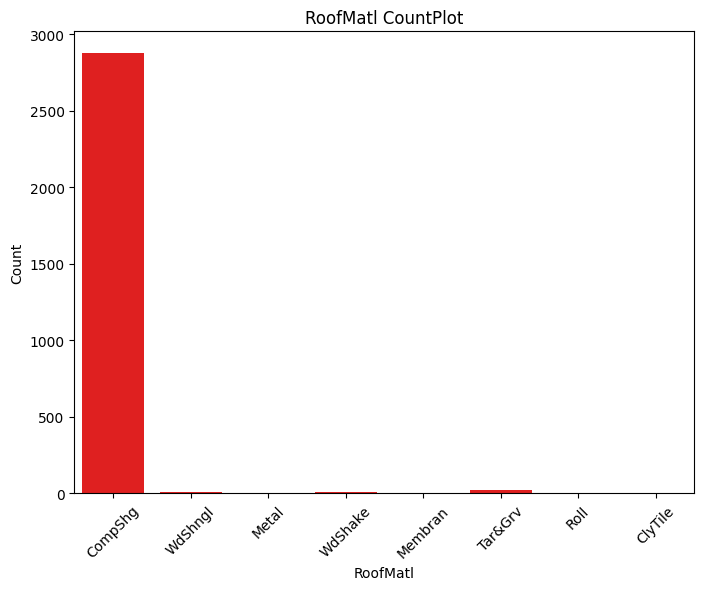

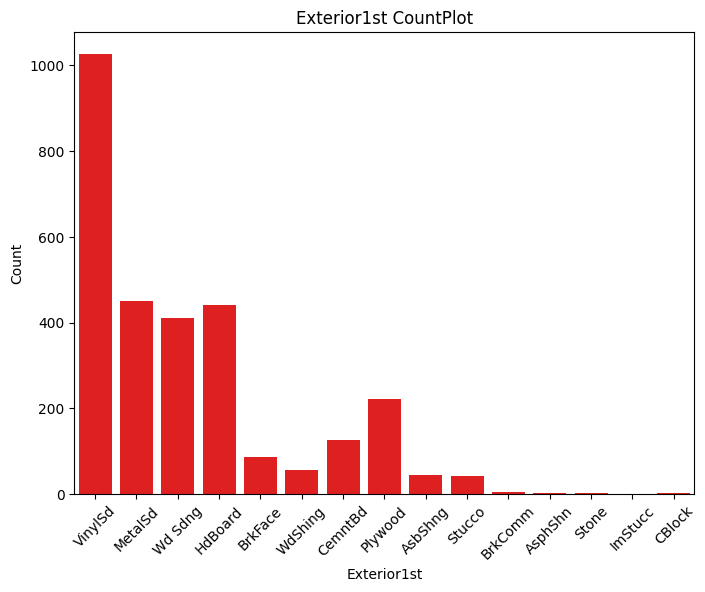

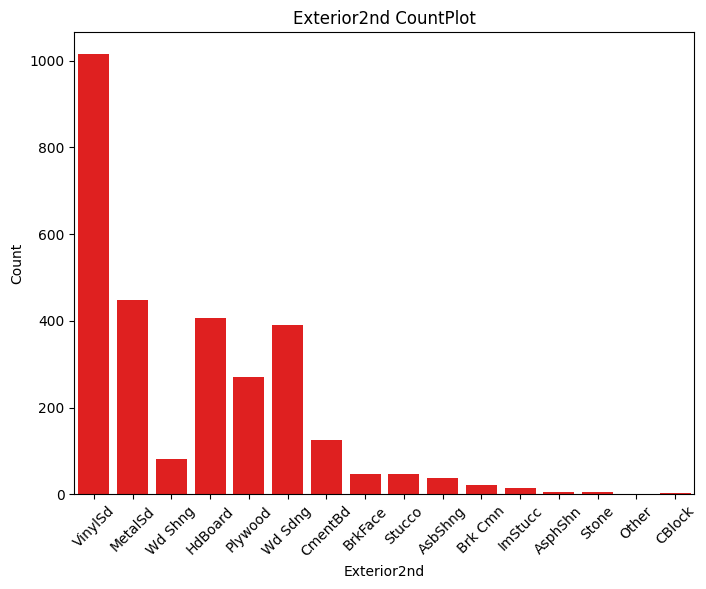

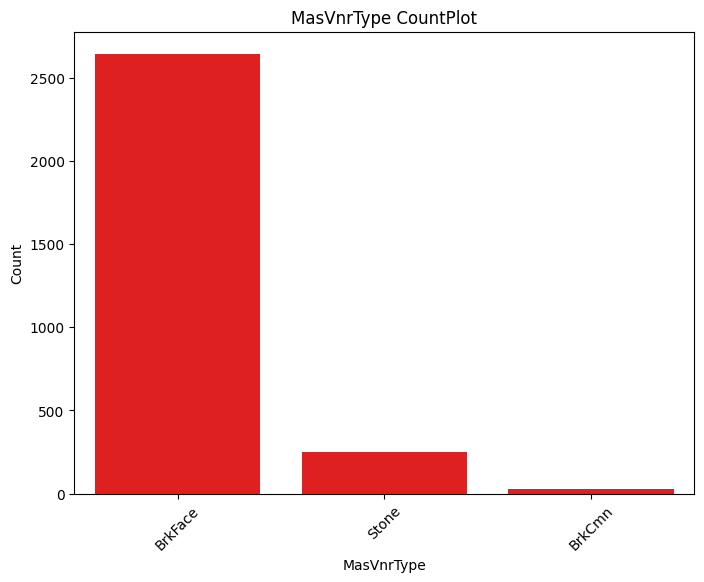

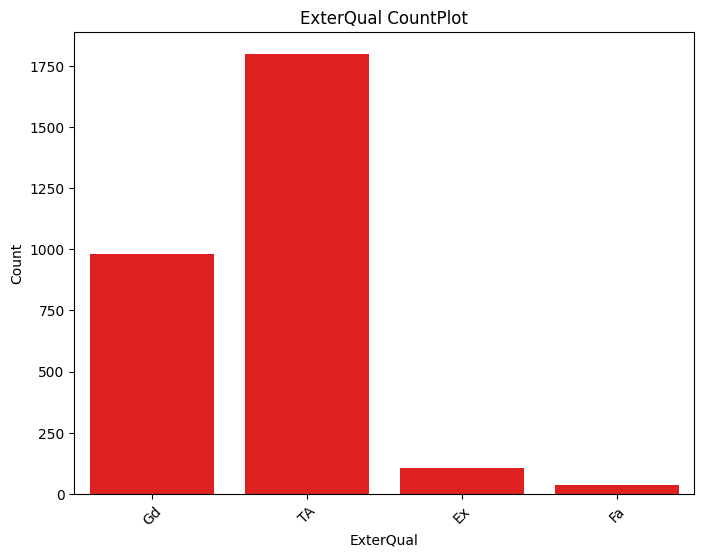

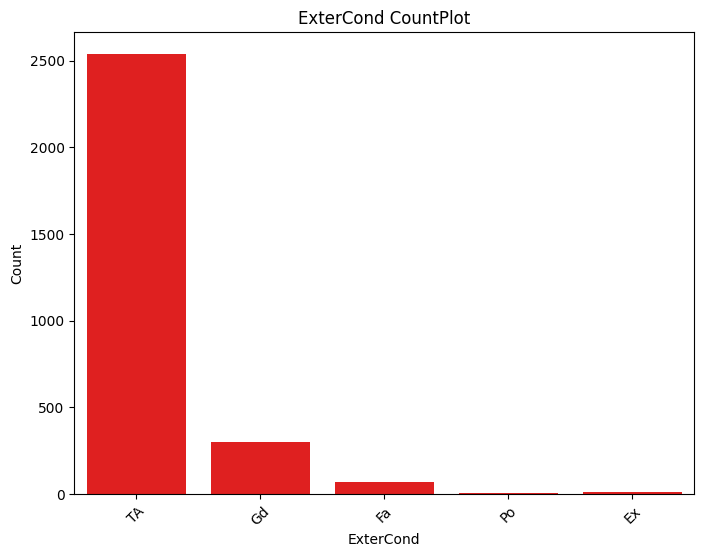

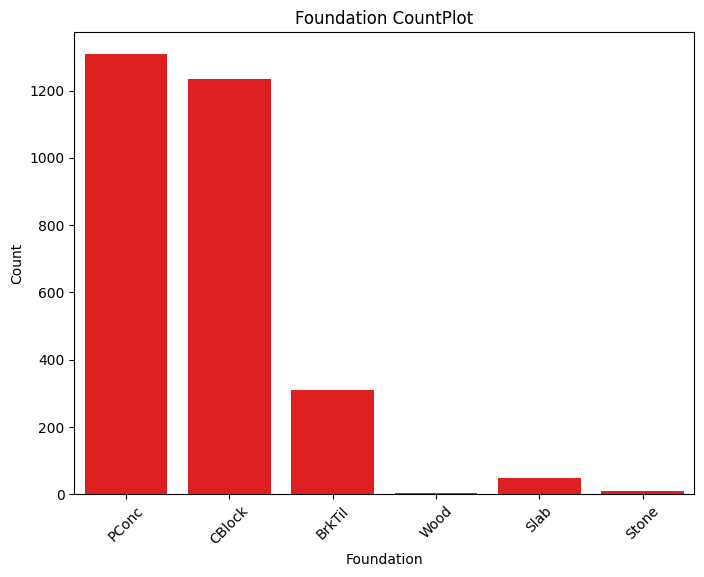

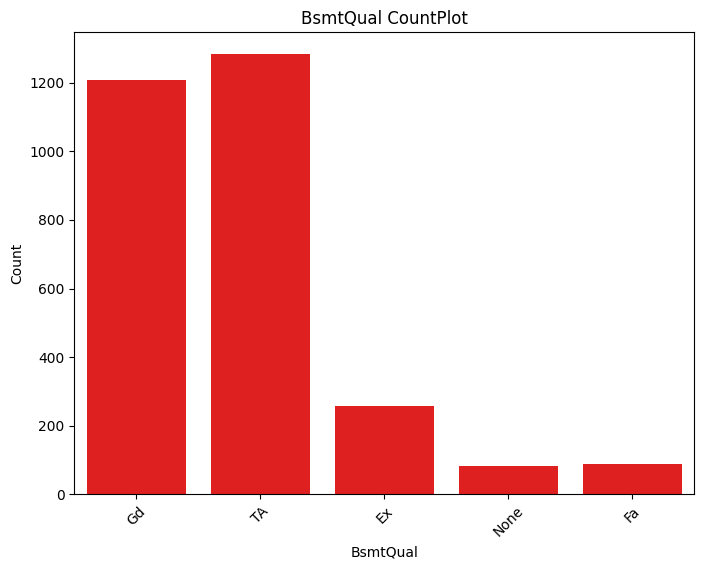

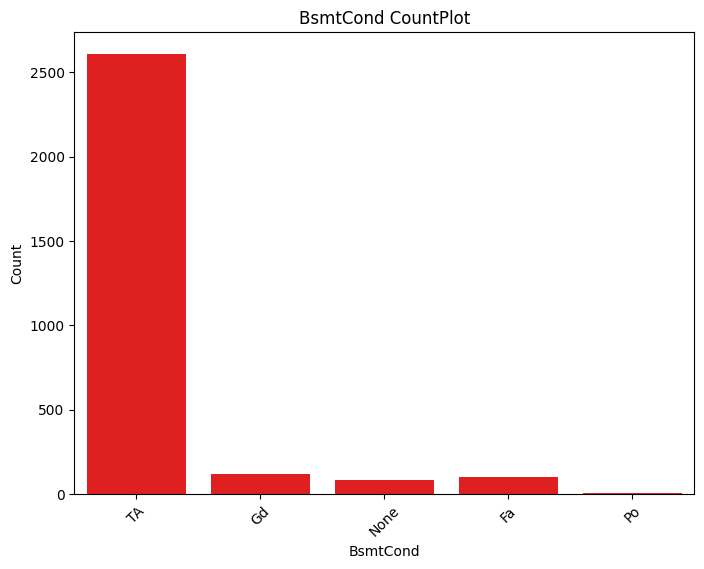

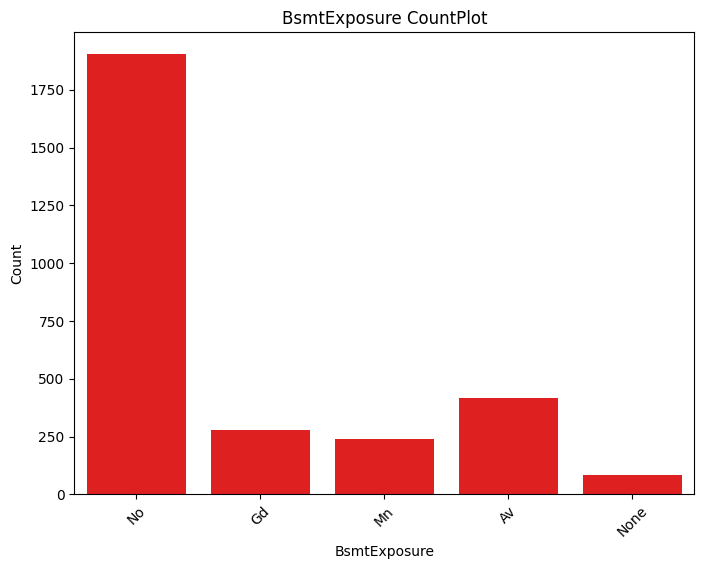

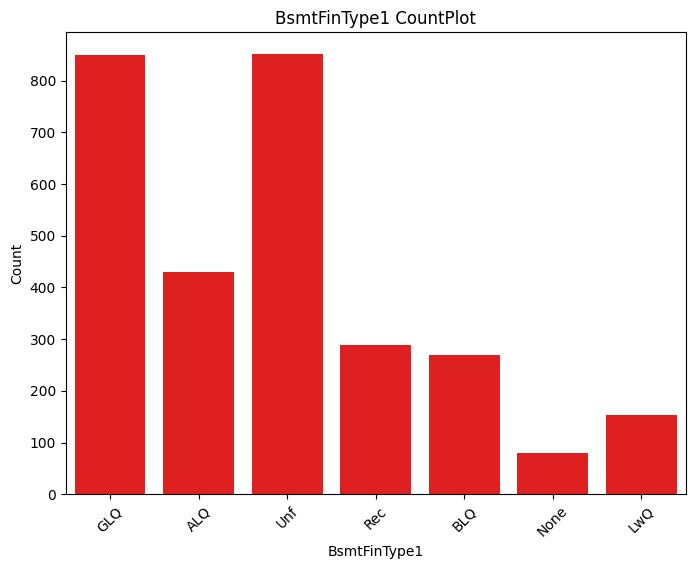

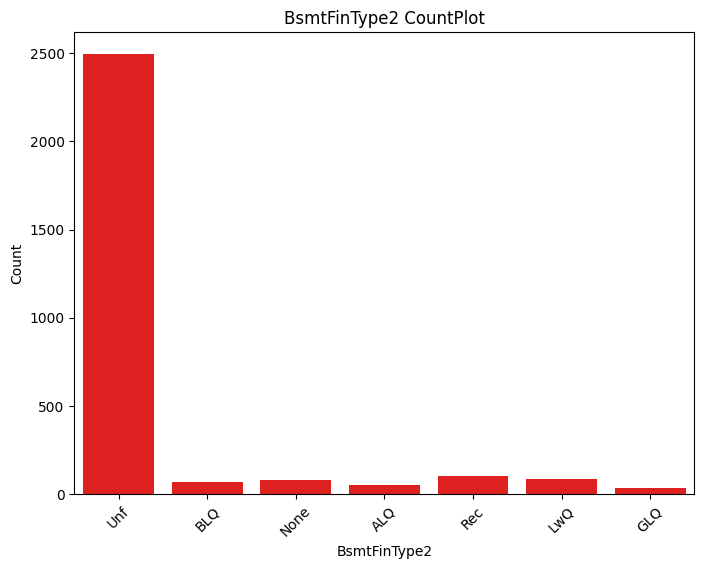

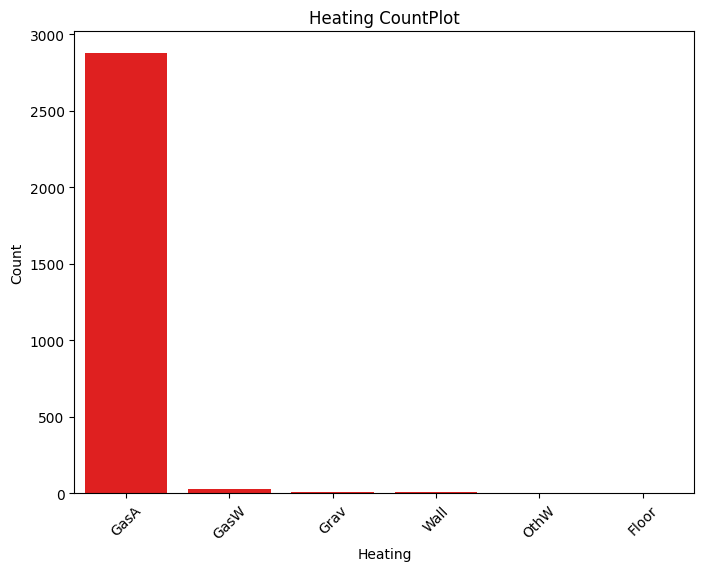

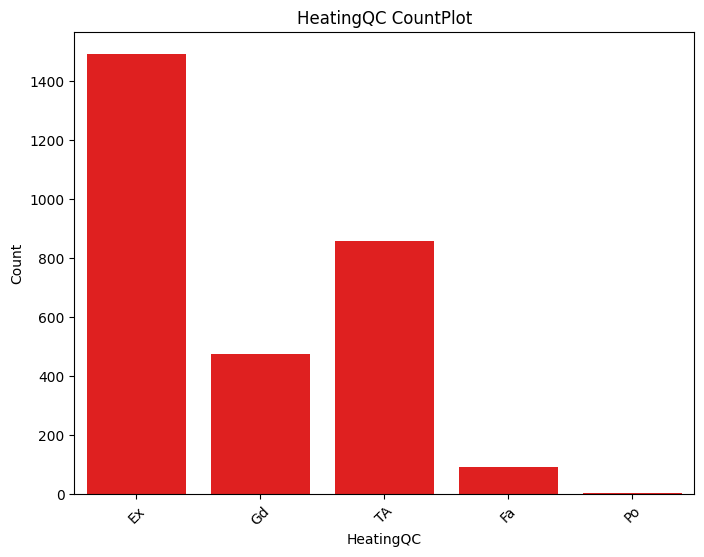

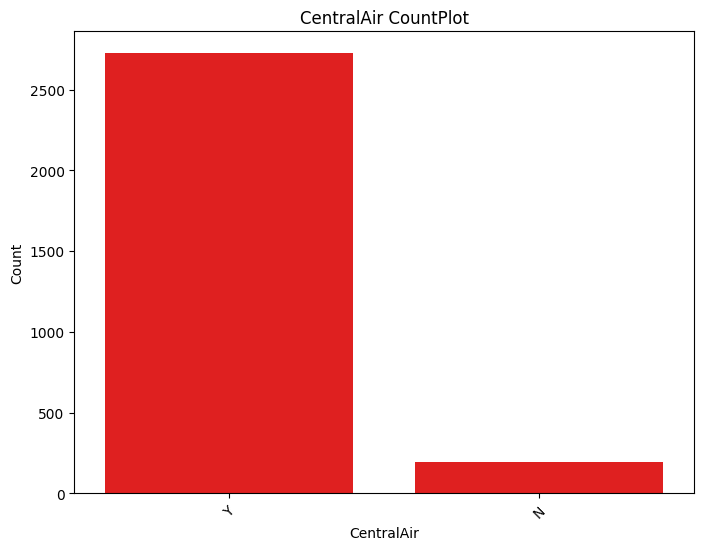

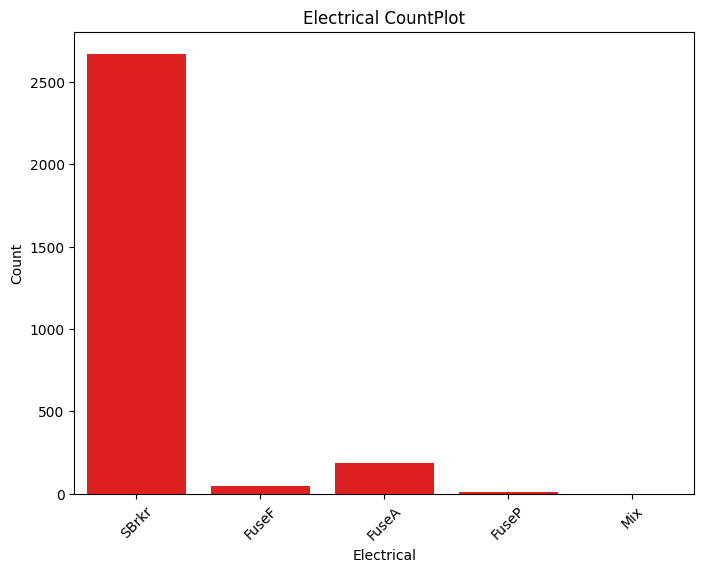

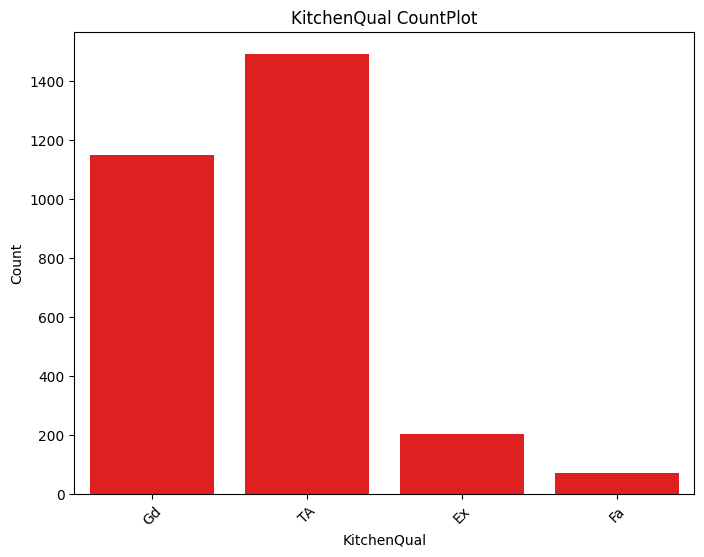

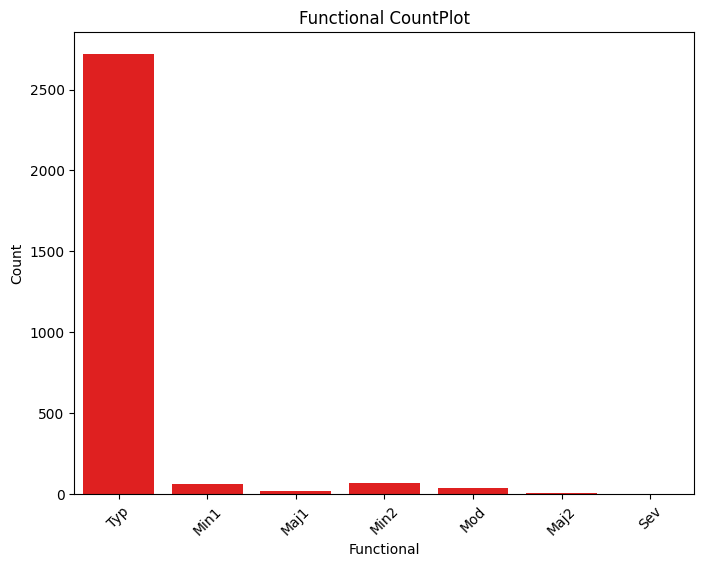

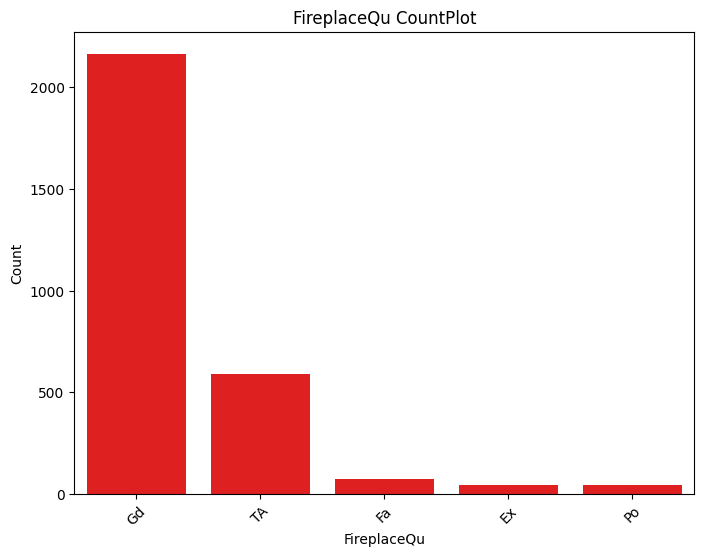

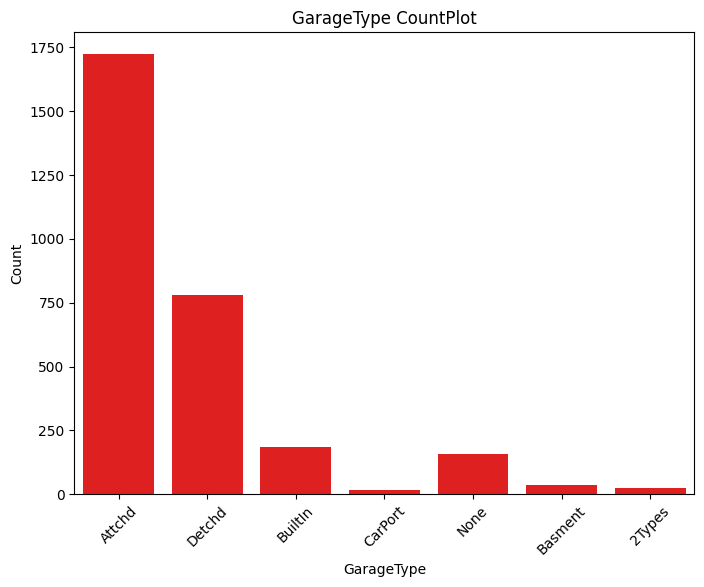

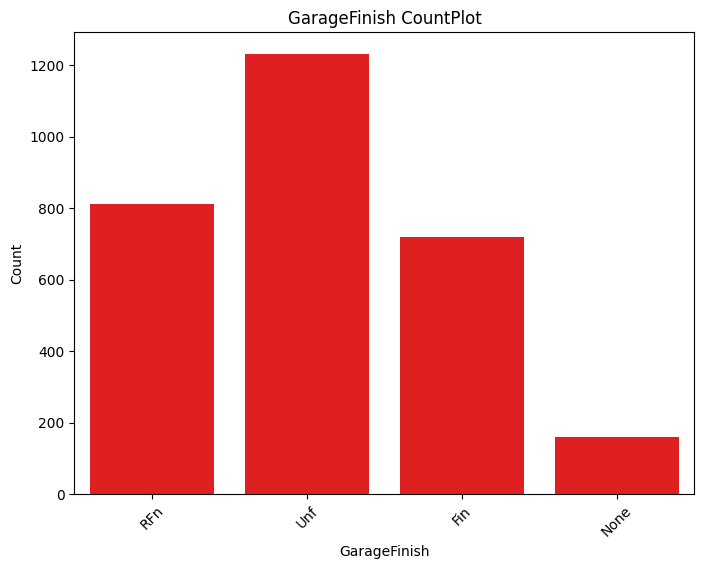

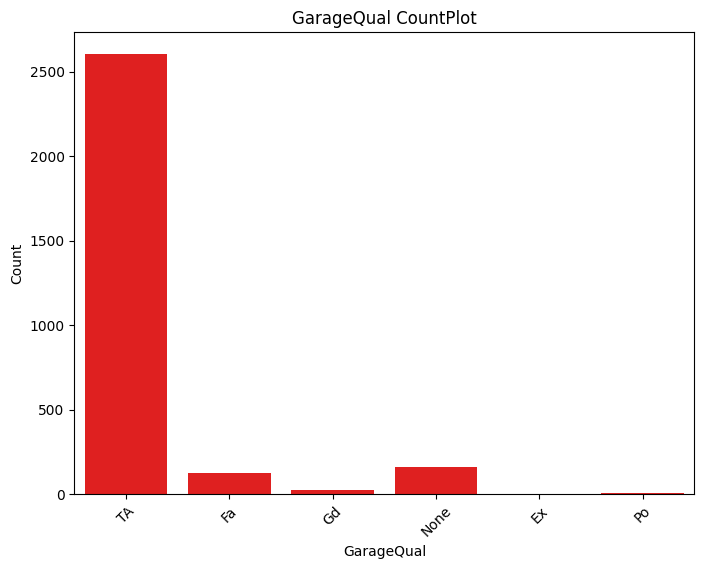

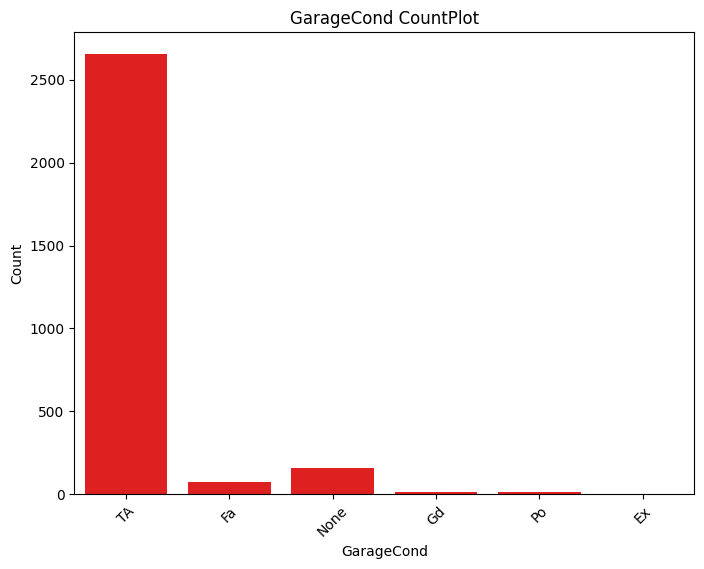

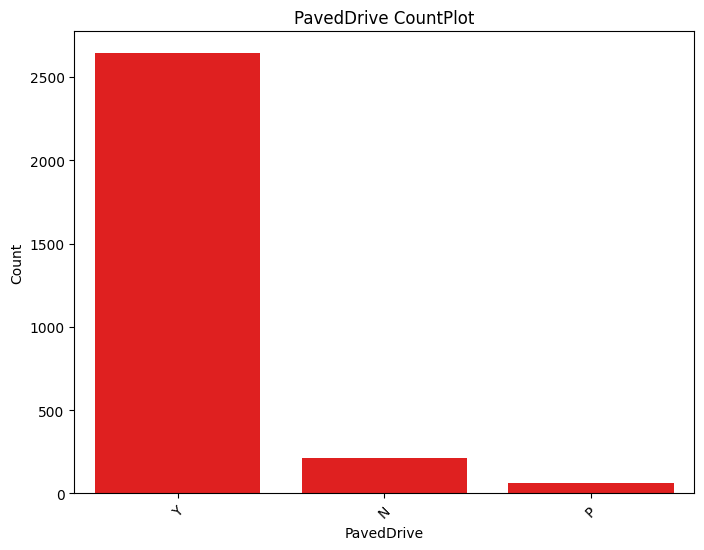

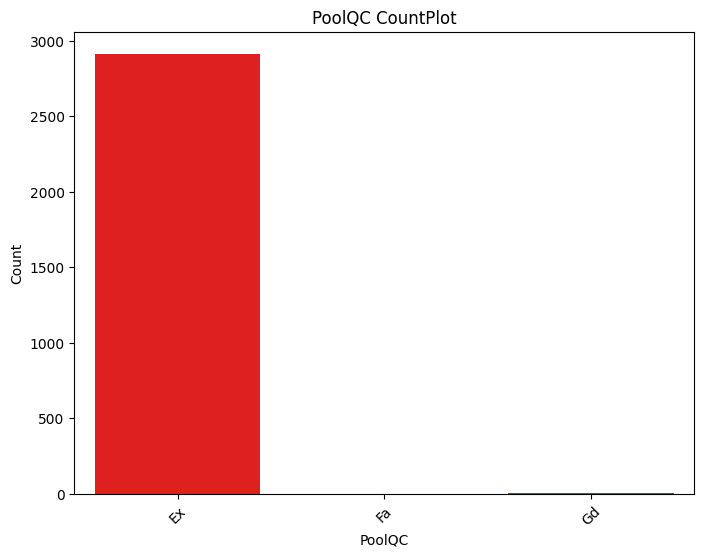

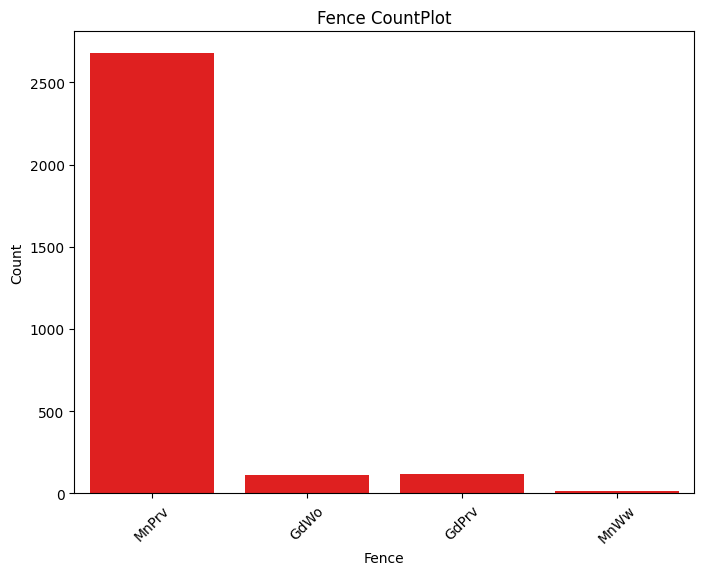

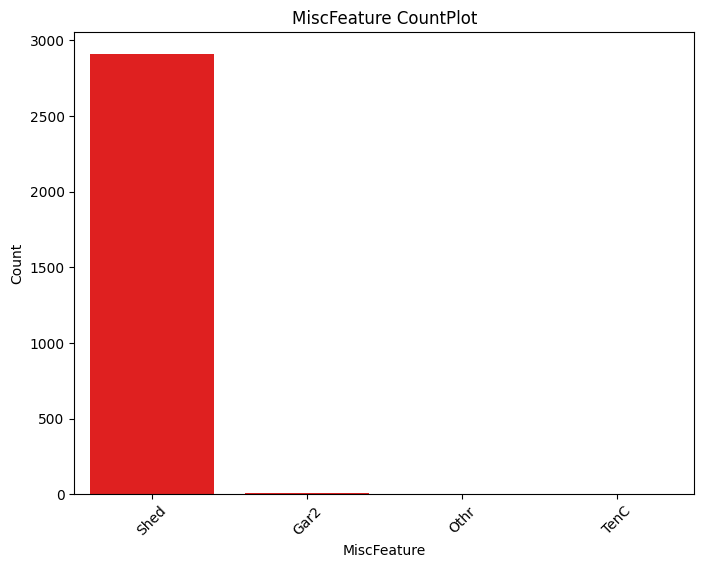

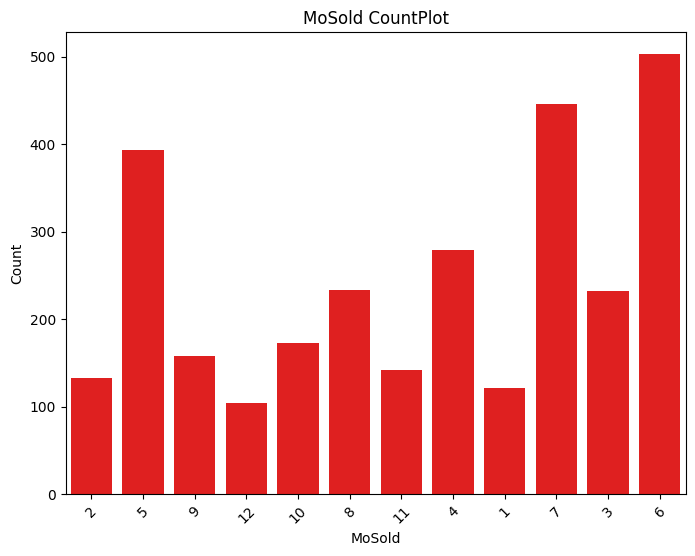

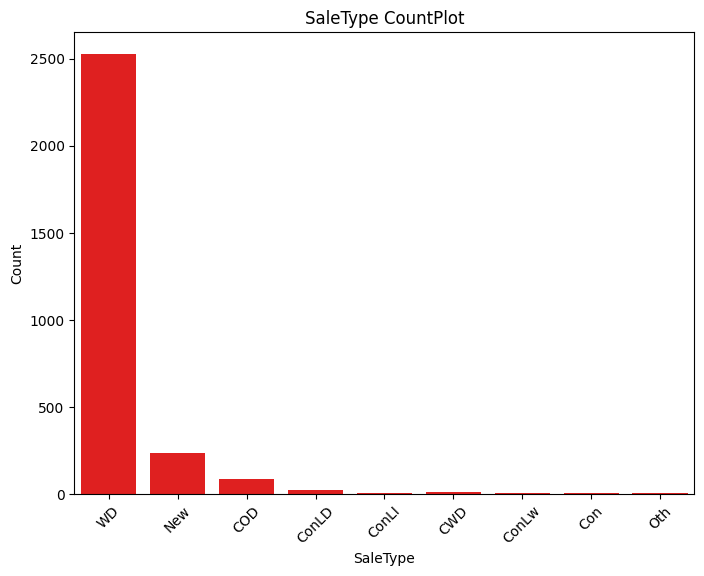

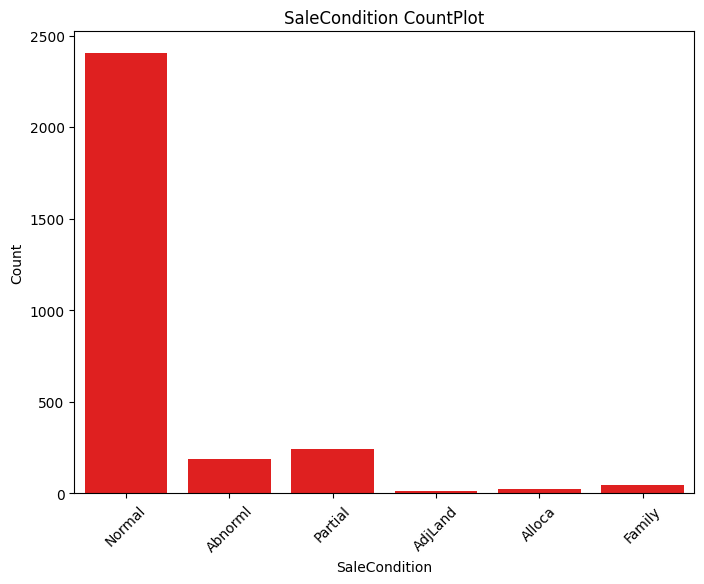

In [219]:
categorical_features = df_total.select_dtypes(include = ['object']).columns
for feature in categorical_features:
  plt.figure(figsize = (8,6))
  sns.countplot(data = df_total, x = feature, color ='red')
  plt.title(f"{feature} CountPlot")
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.xticks(rotation = 45)
  plt.show()

ScatterPlot

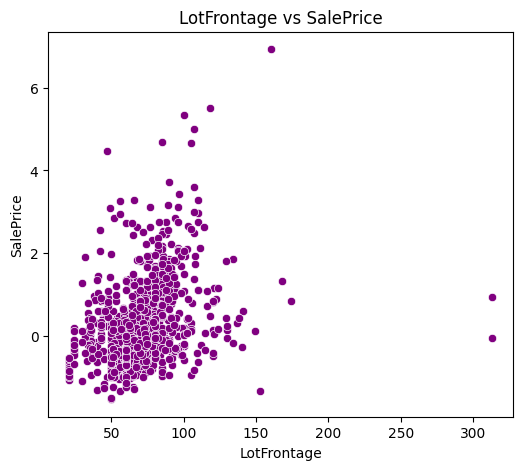

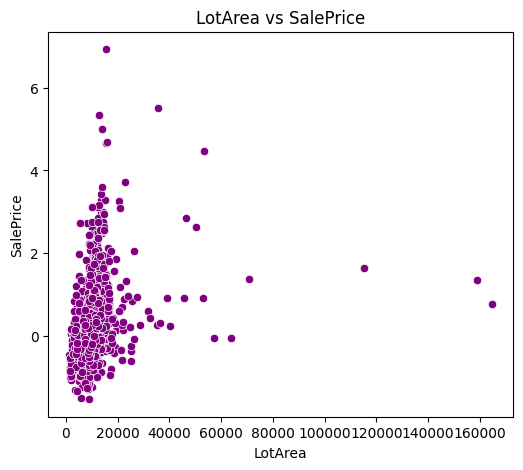

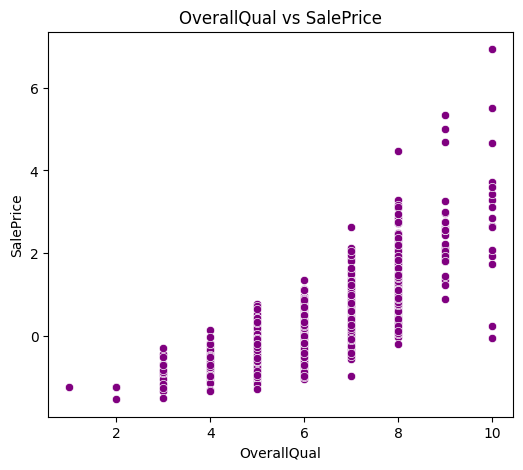

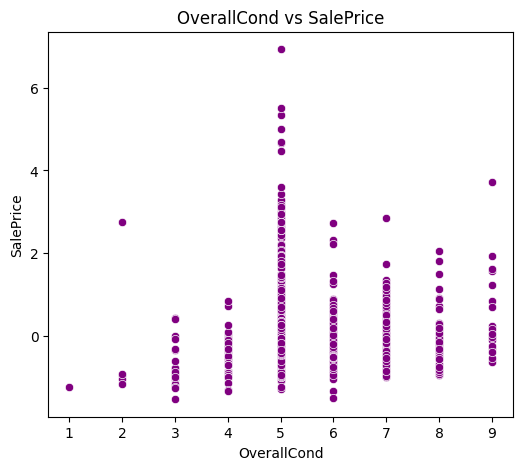

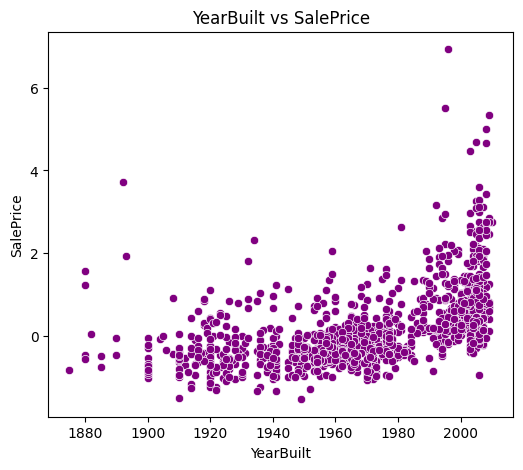

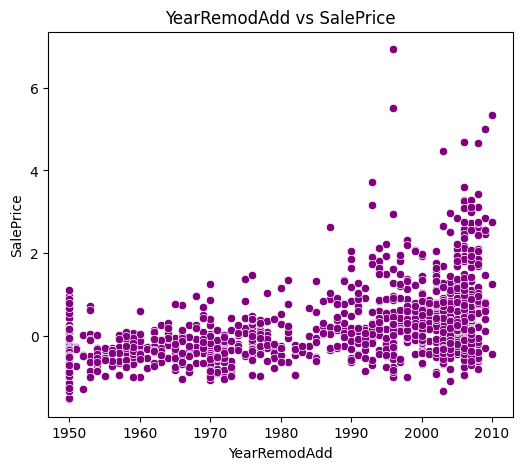

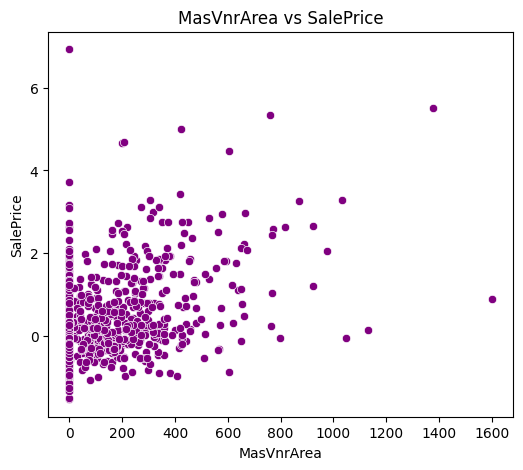

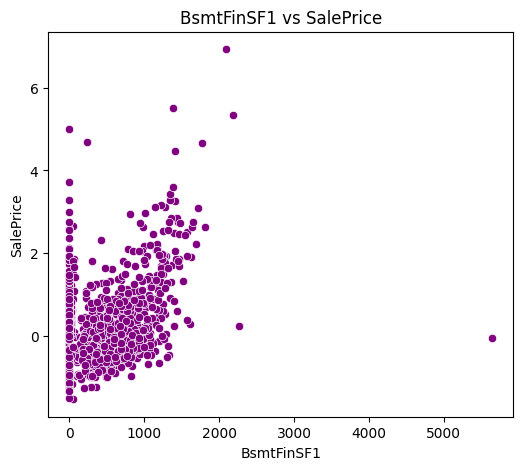

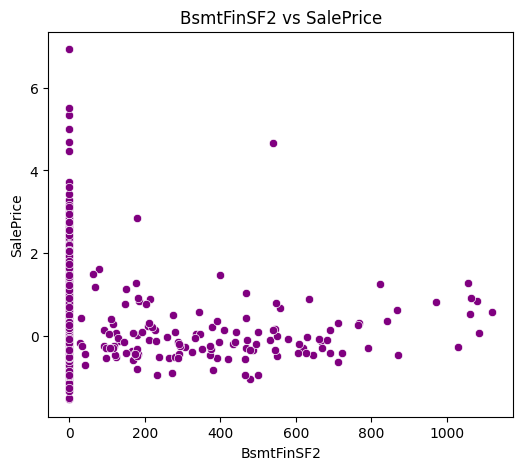

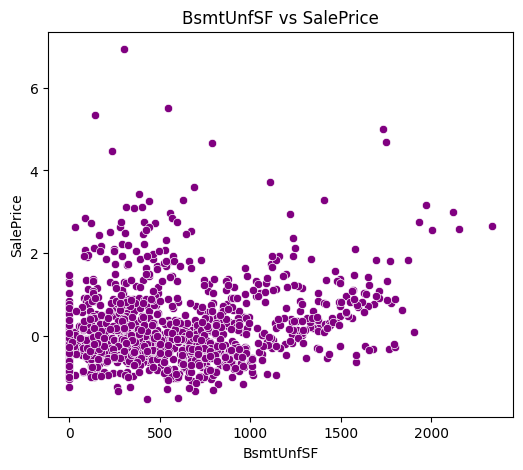

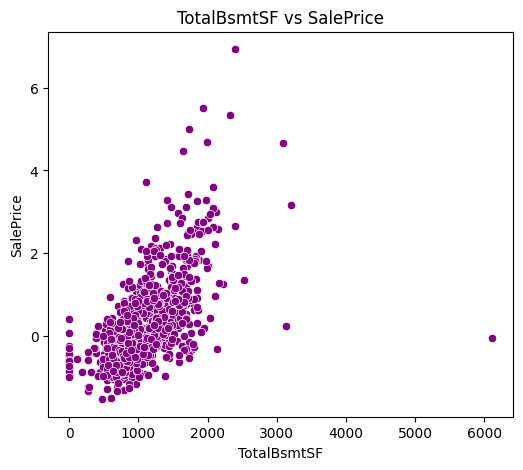

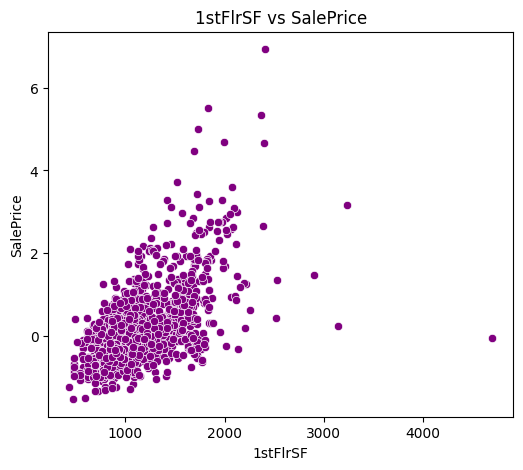

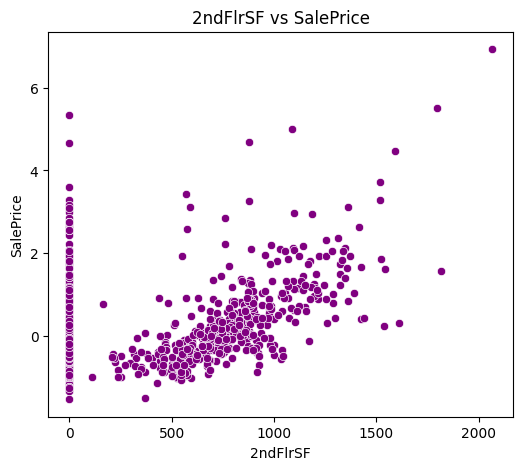

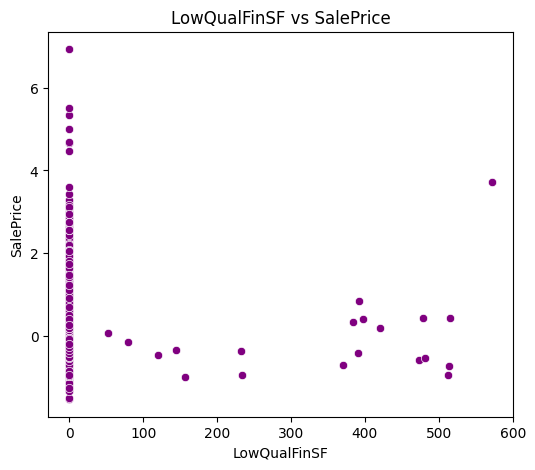

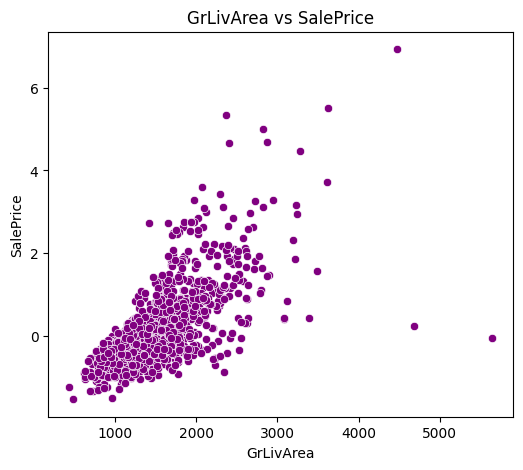

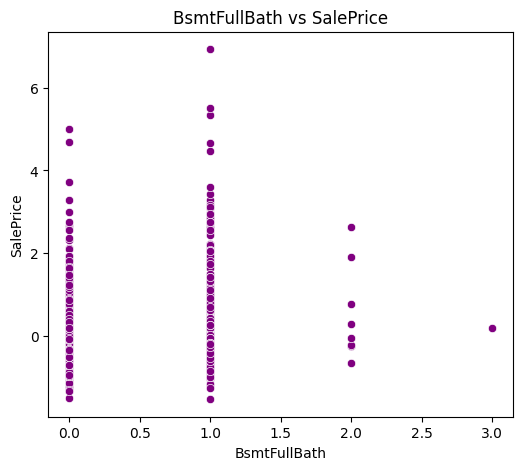

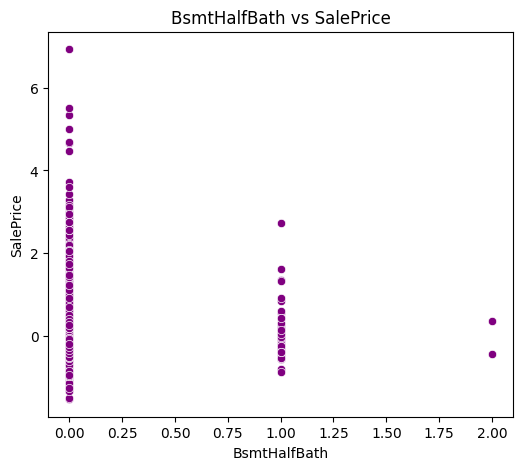

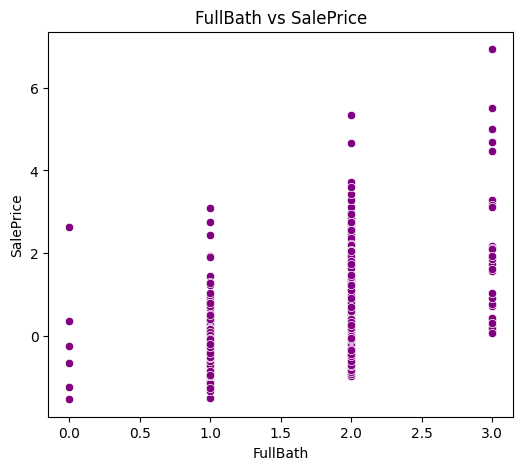

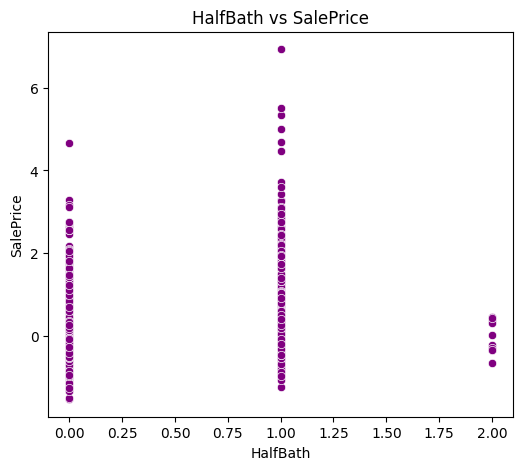

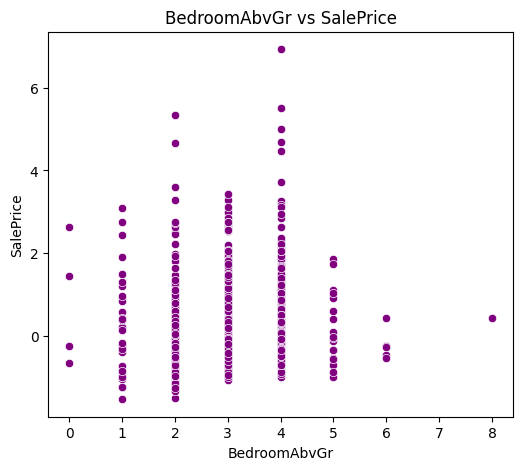

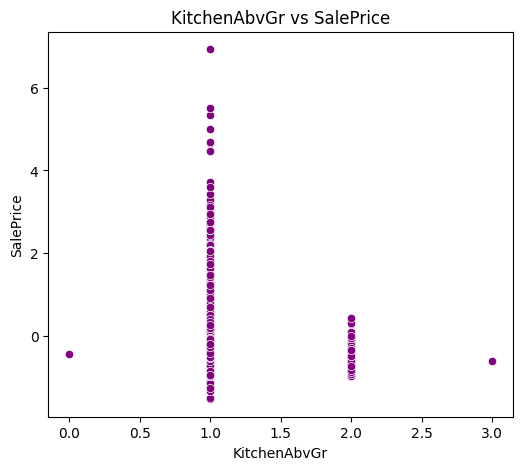

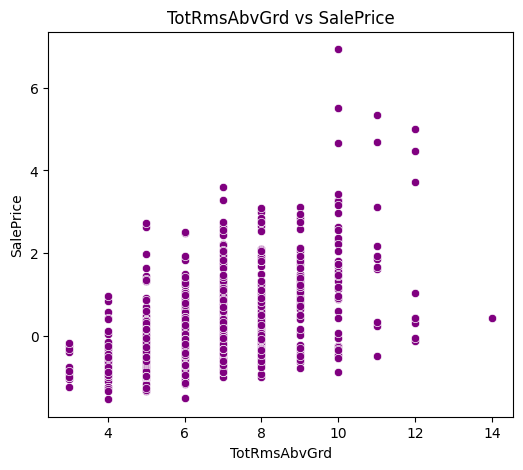

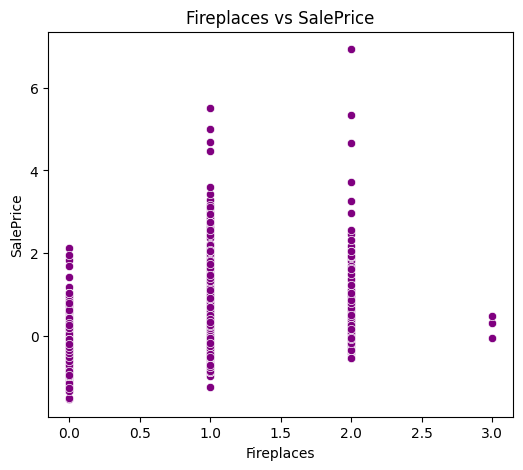

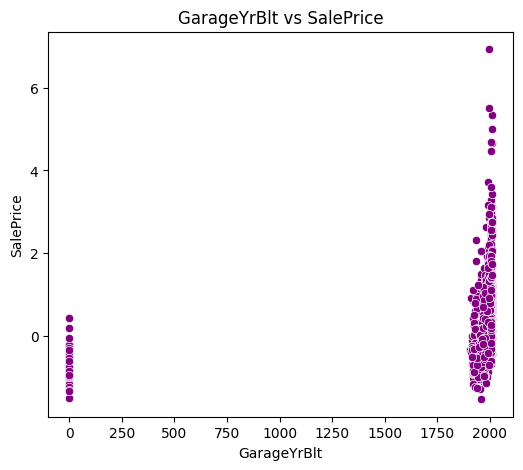

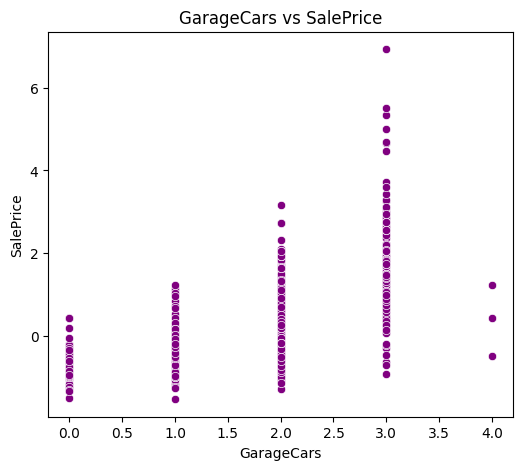

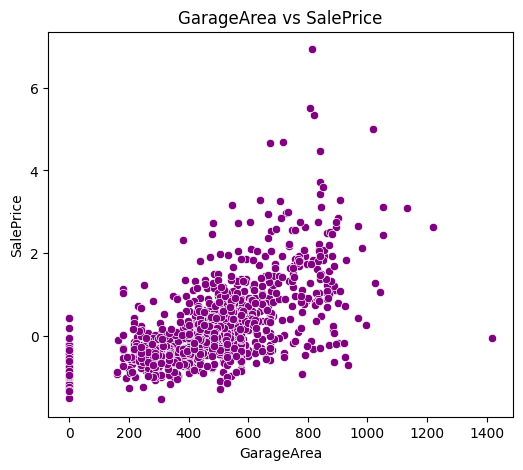

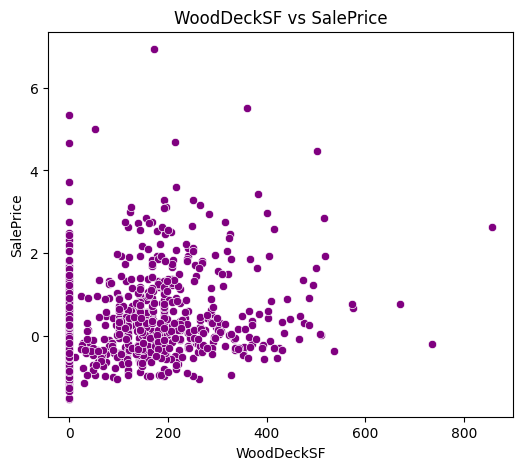

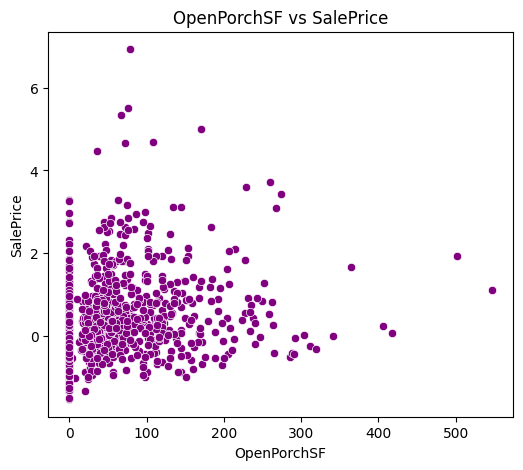

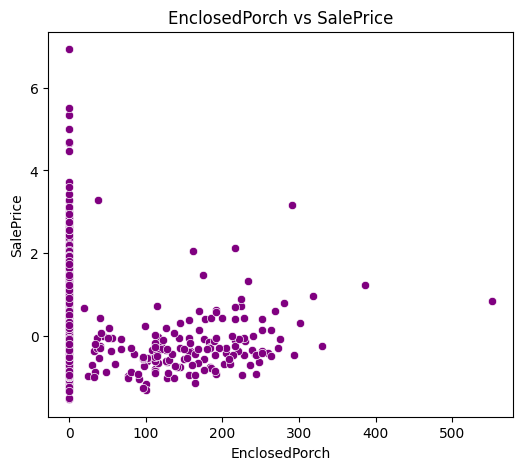

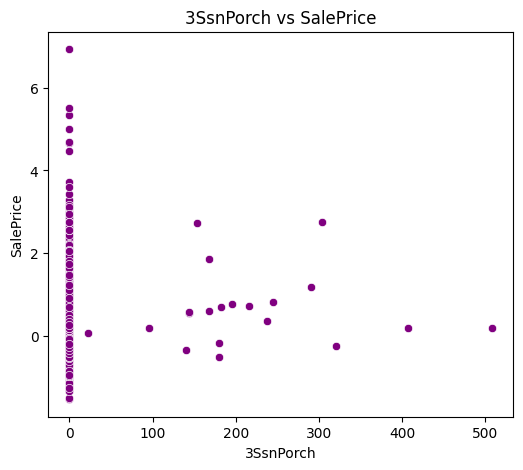

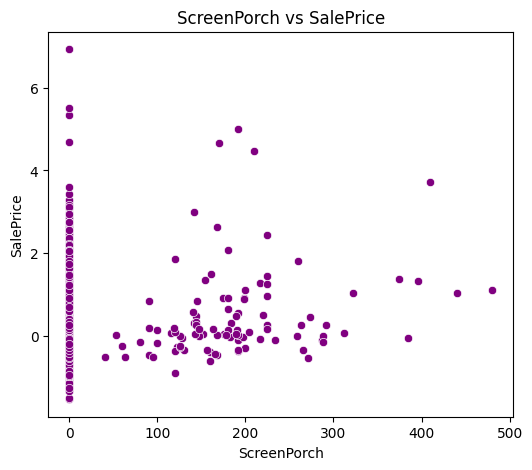

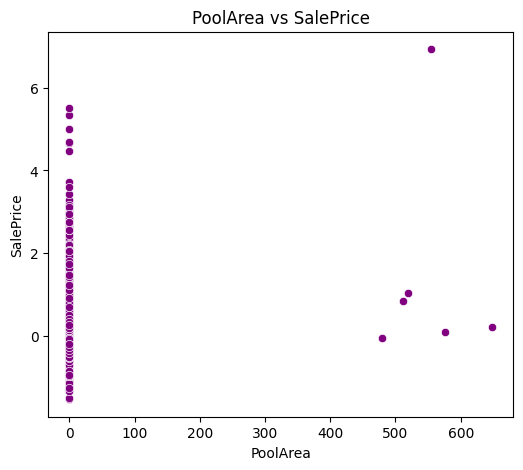

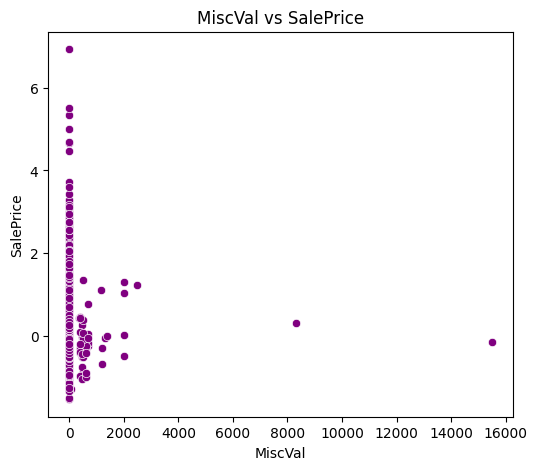

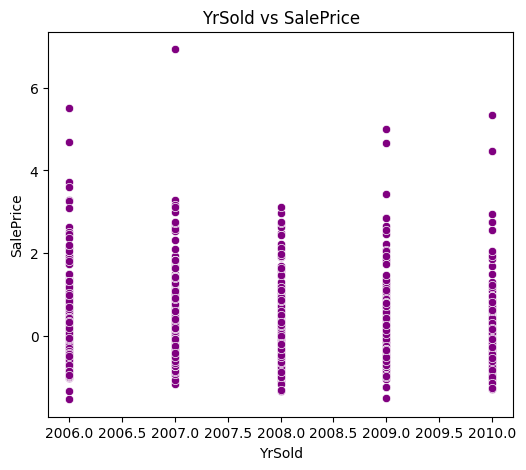

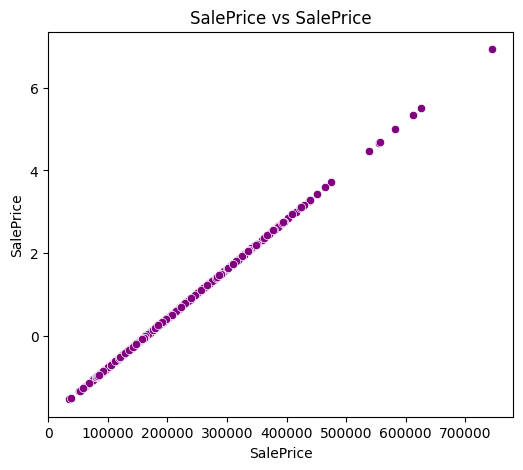

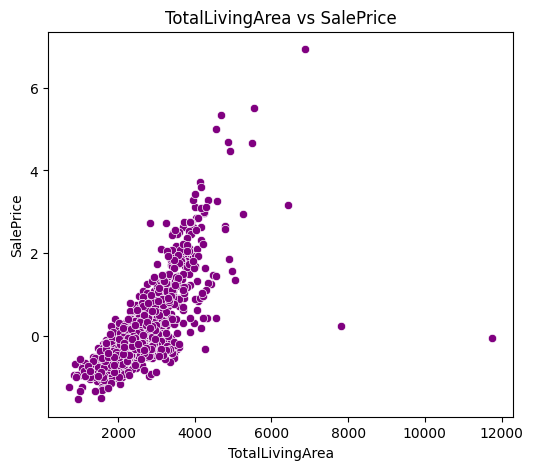

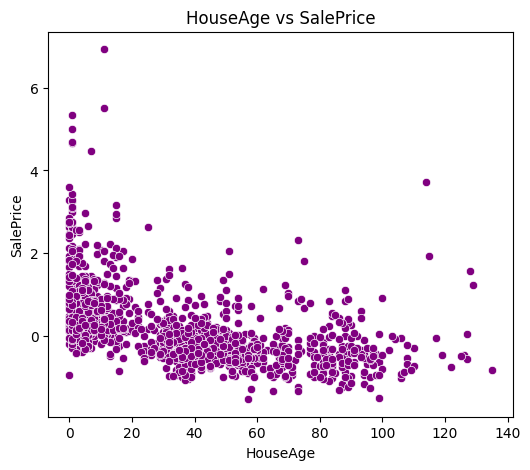

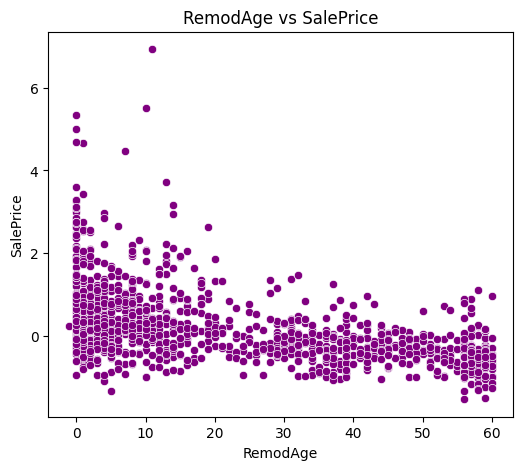

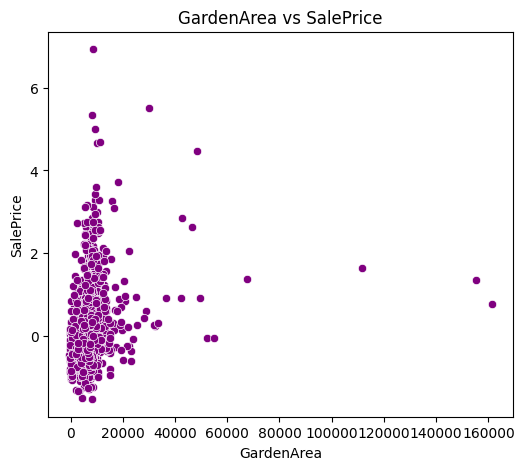

In [220]:
for feature in numerical_features:
  plt.figure(figsize = (6,5))
  sns.scatterplot(x = df_total[feature][:ntrain], y = y_train,color = 'purple')
  plt.title(f"{feature} vs SalePrice")
  plt.xlabel(feature)
  plt.ylabel("SalePrice")
  plt.show()

BoxPlot

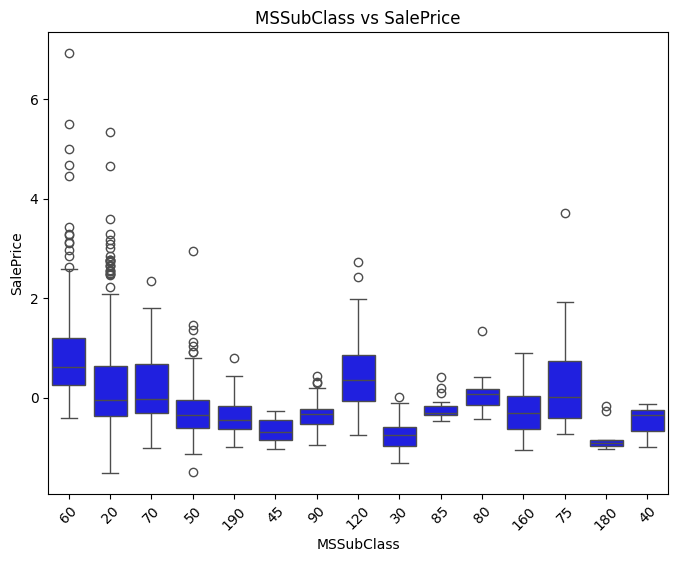

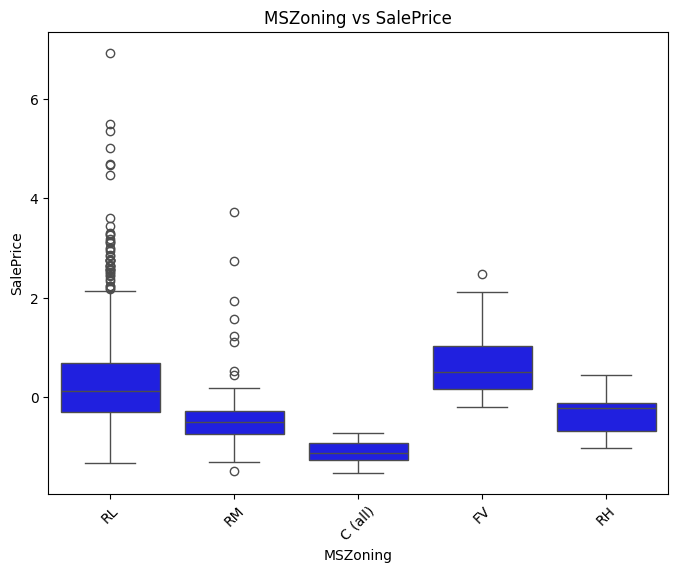

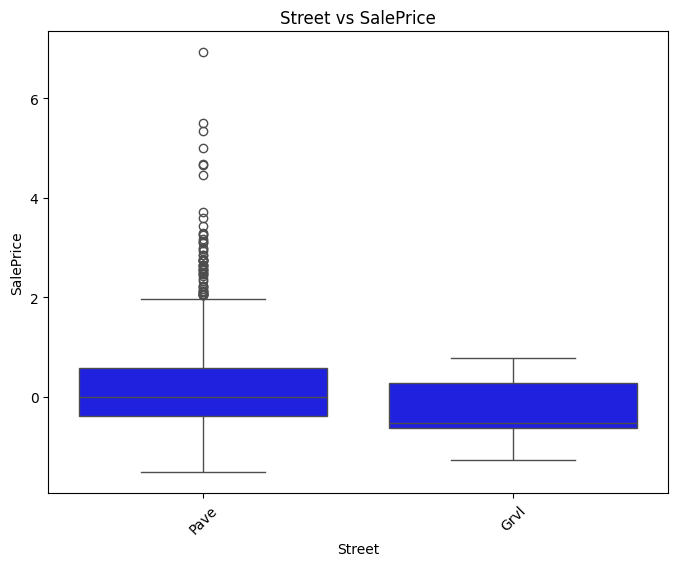

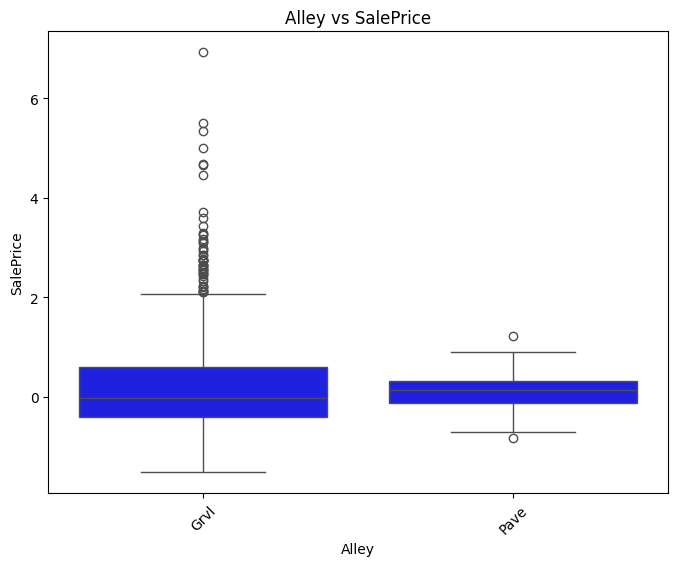

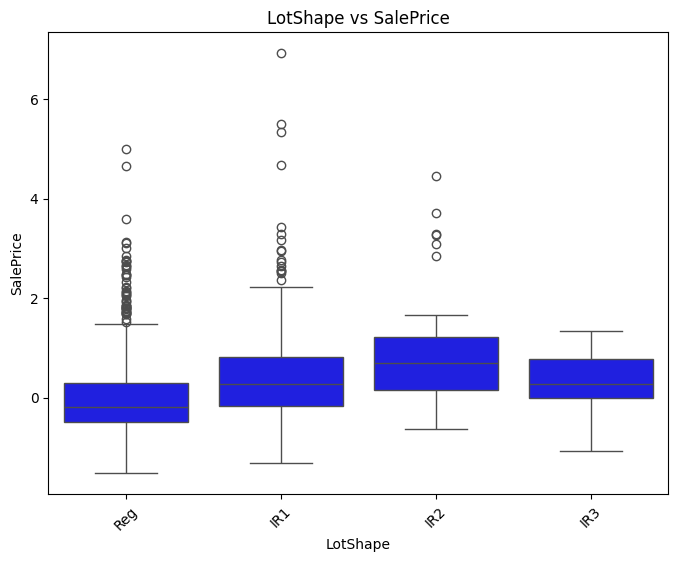

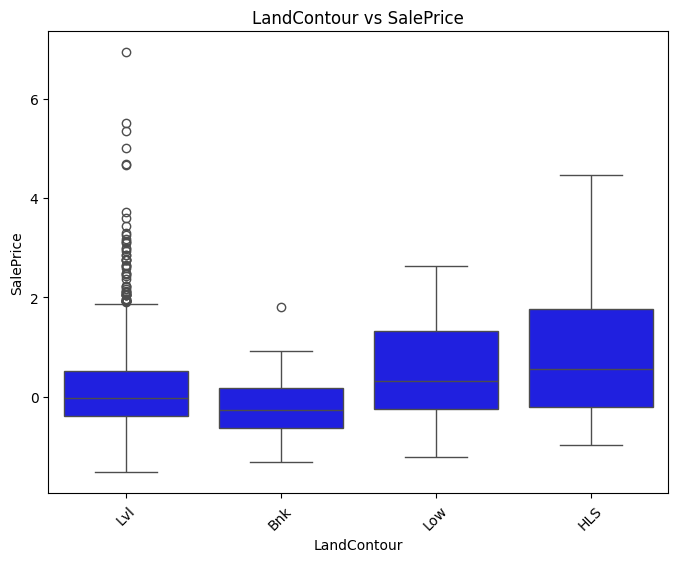

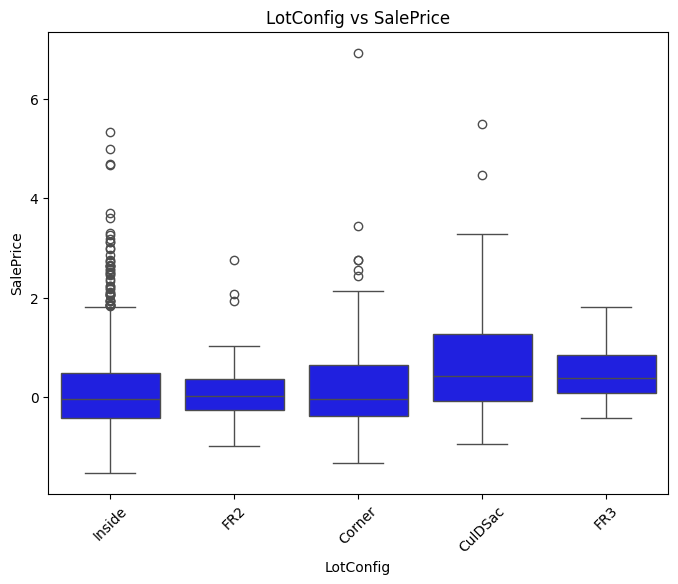

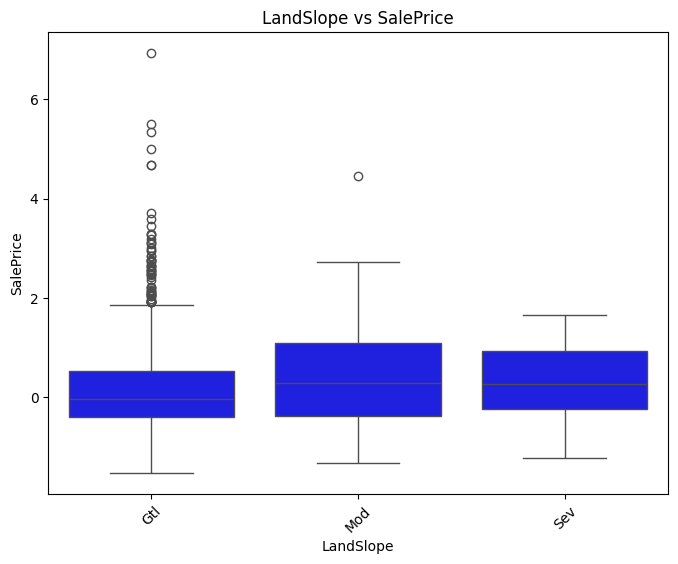

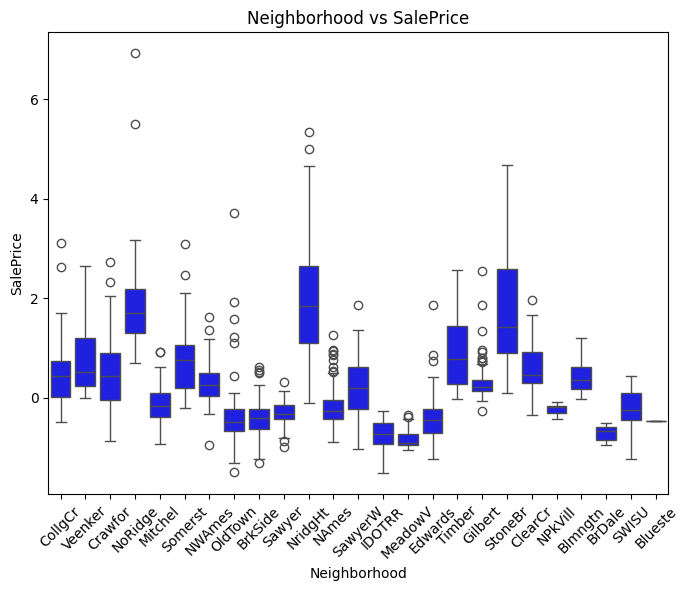

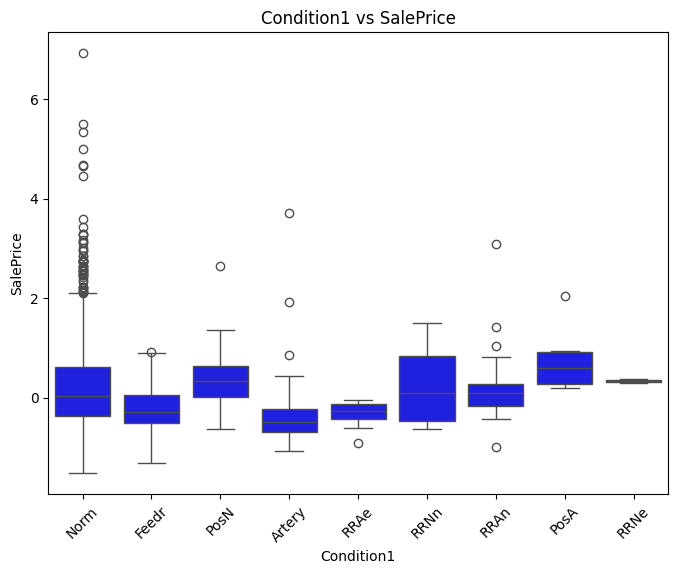

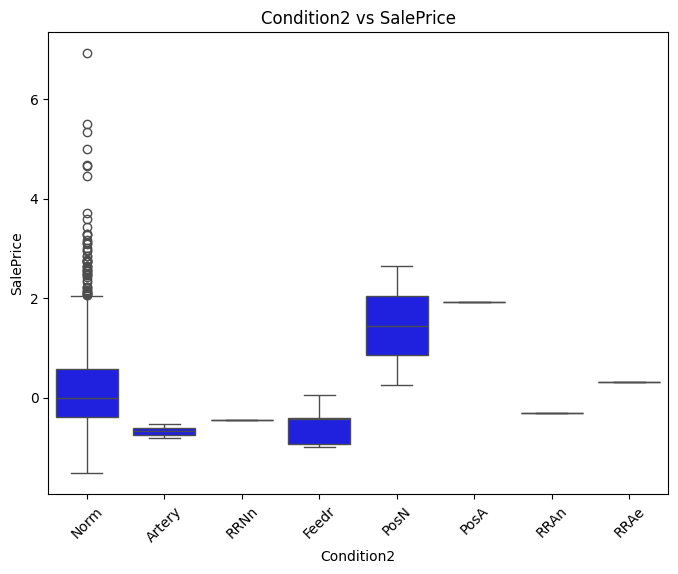

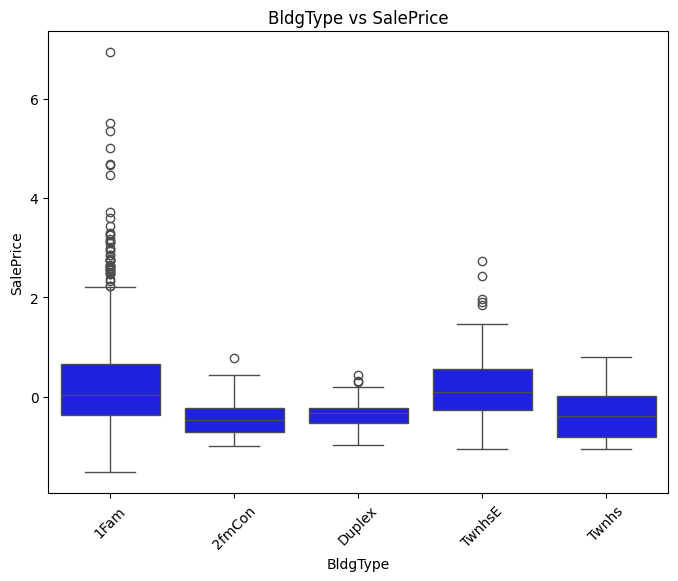

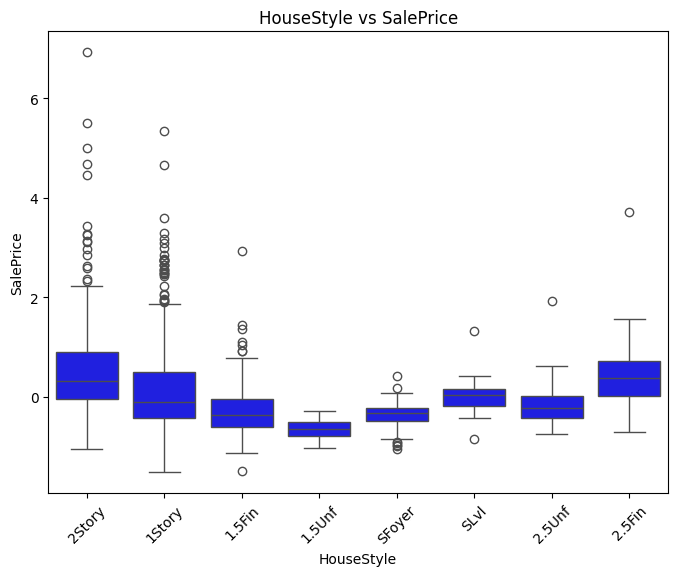

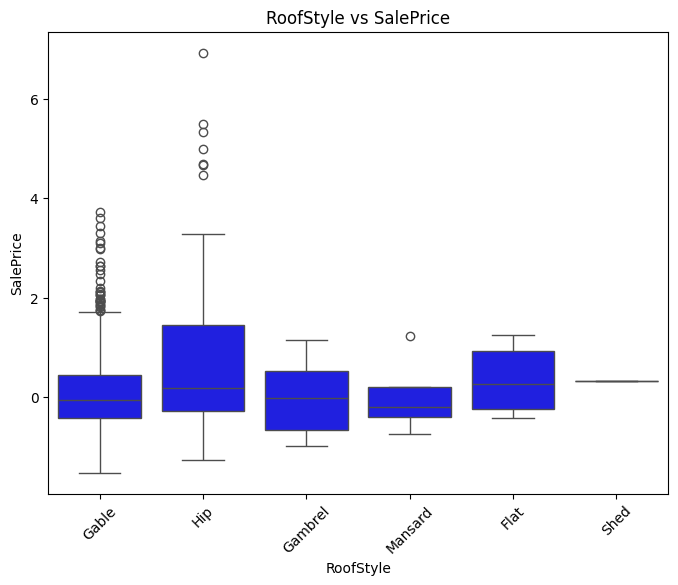

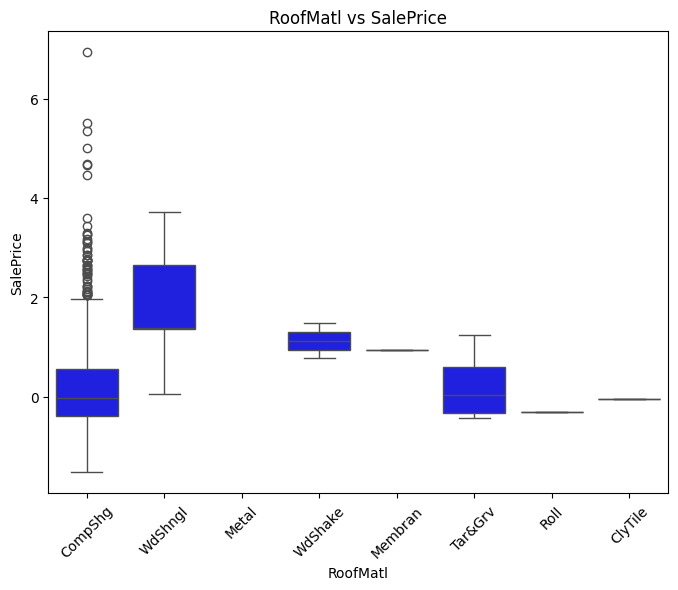

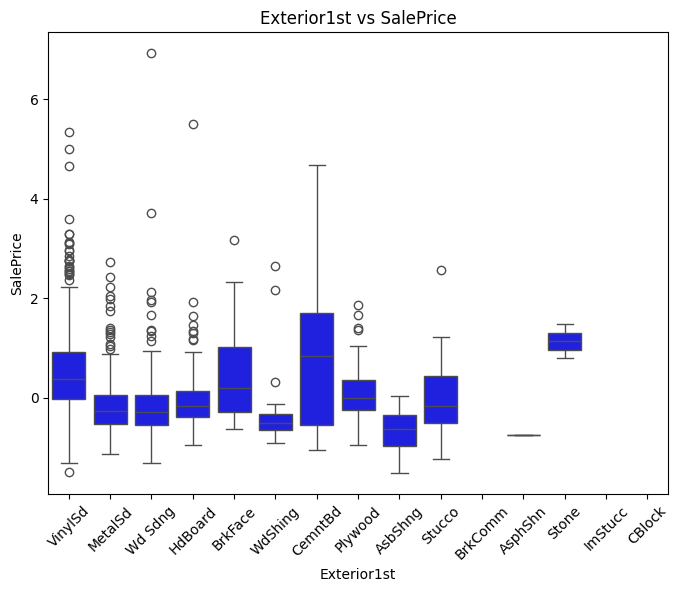

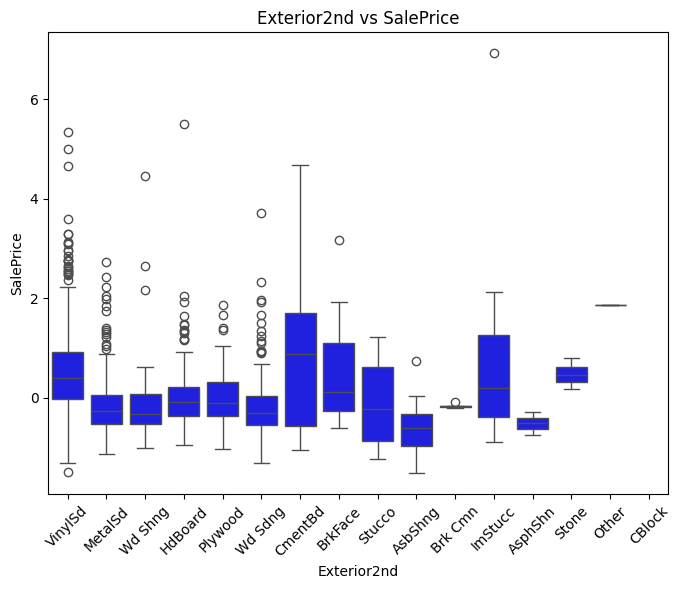

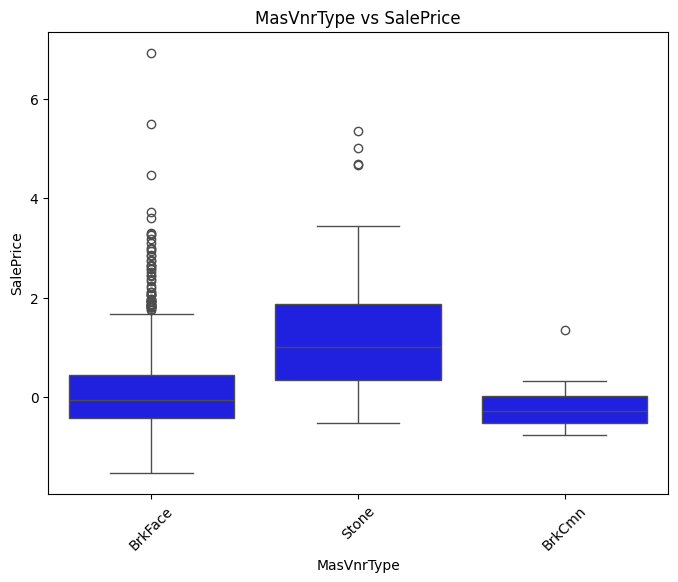

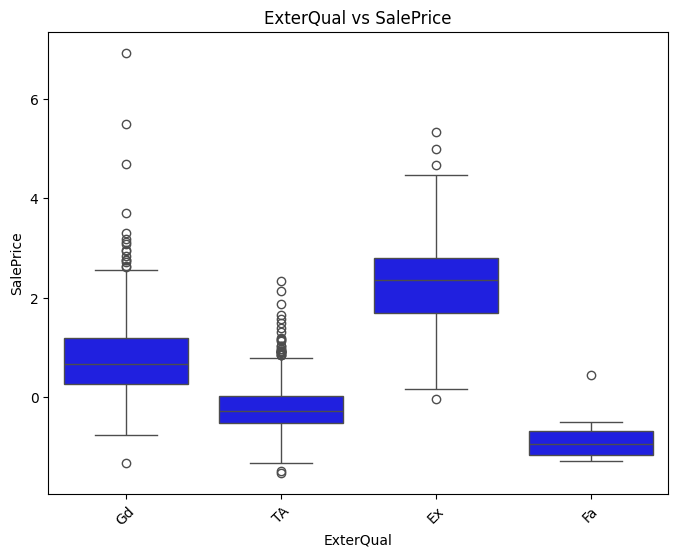

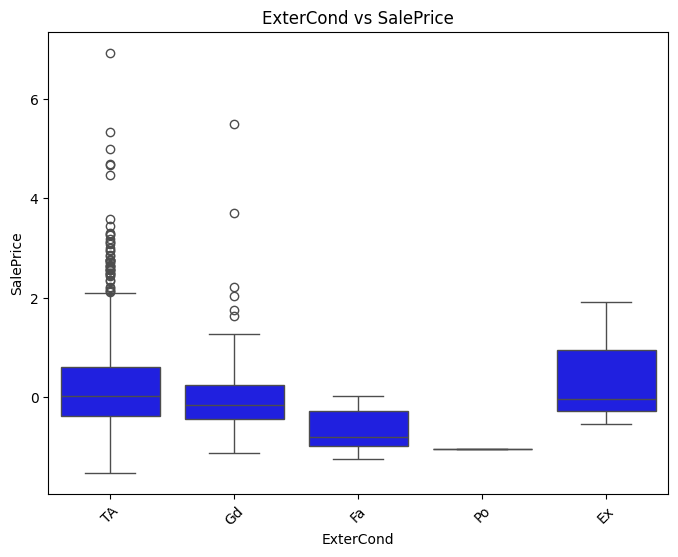

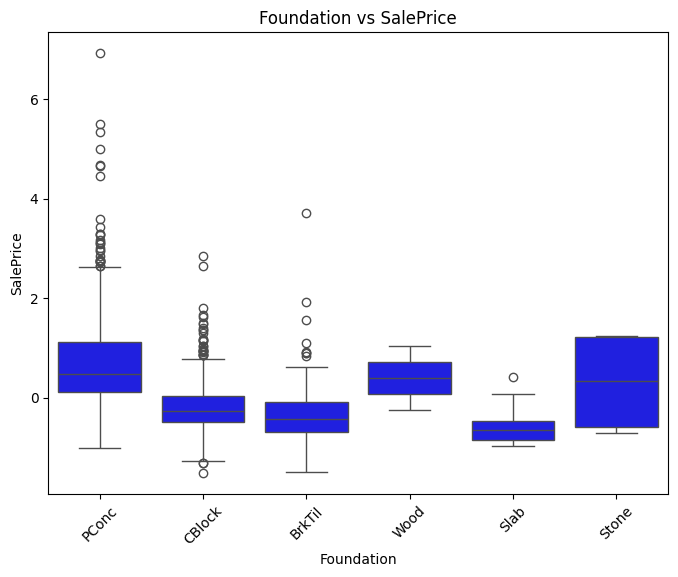

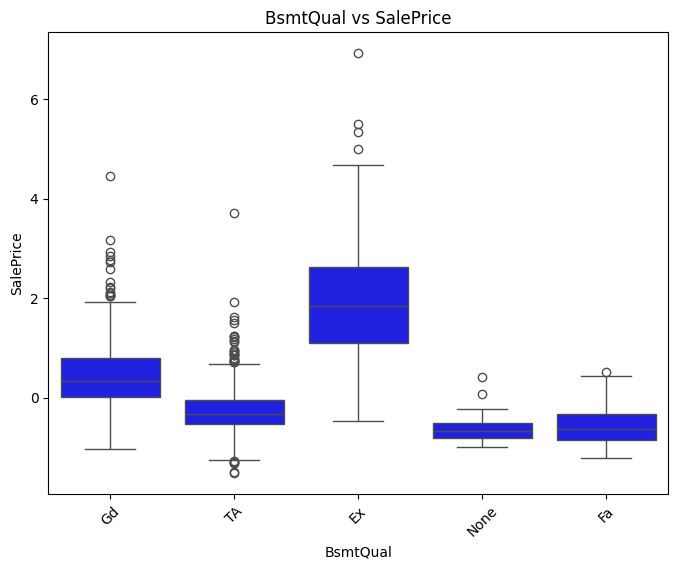

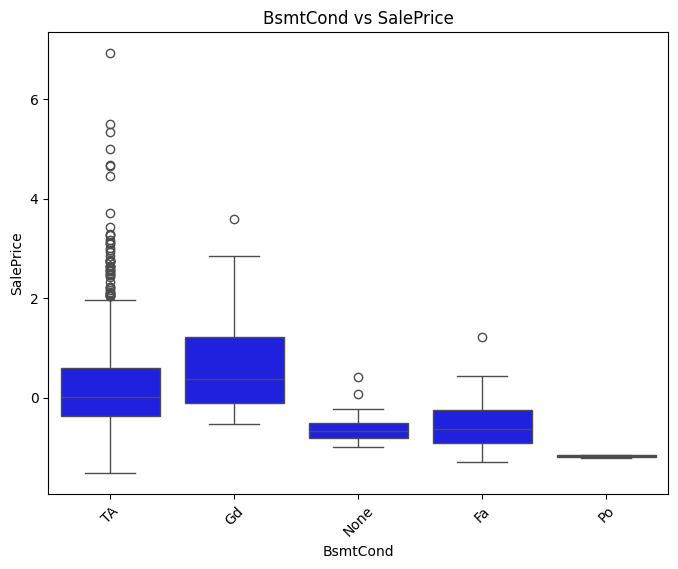

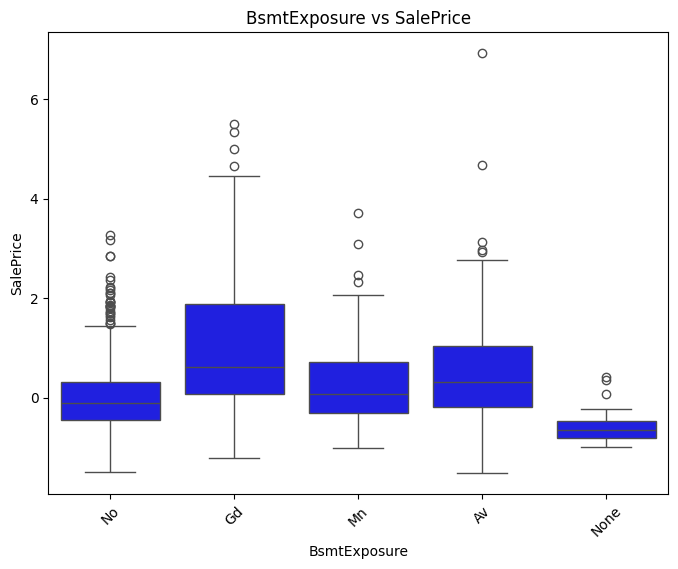

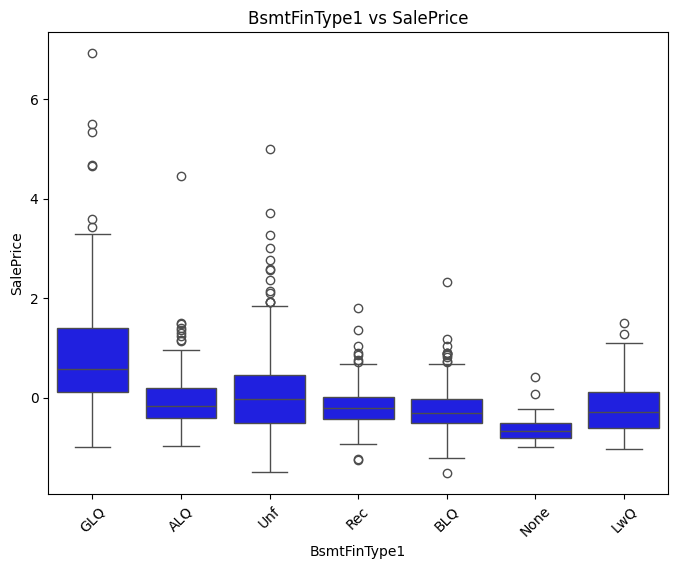

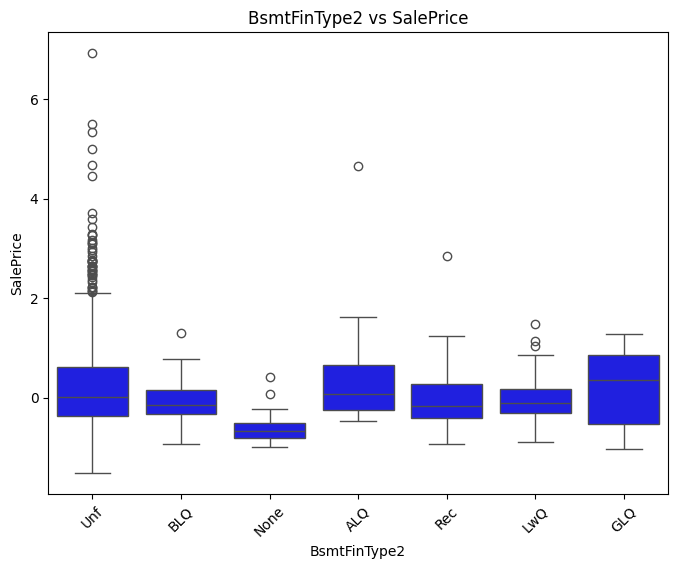

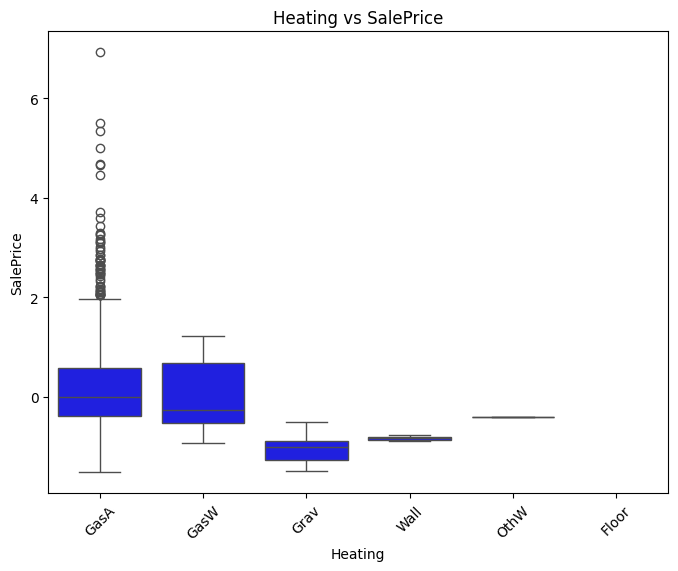

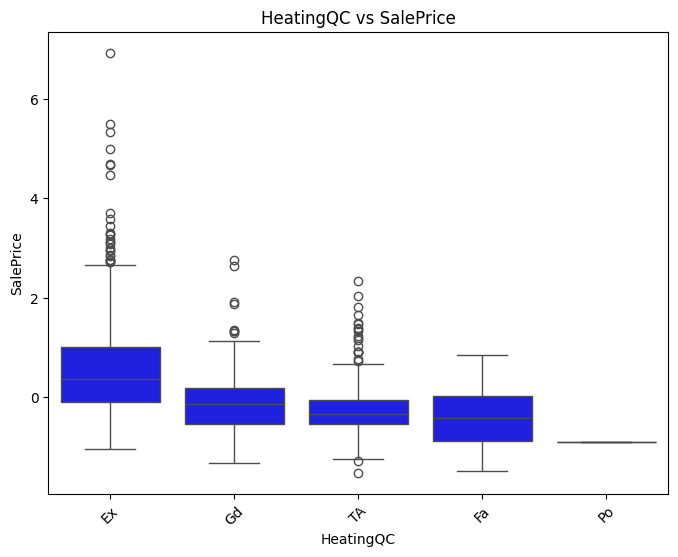

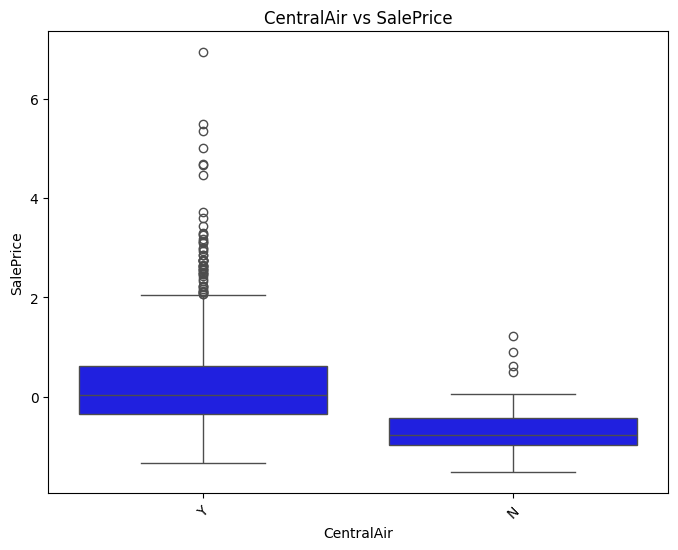

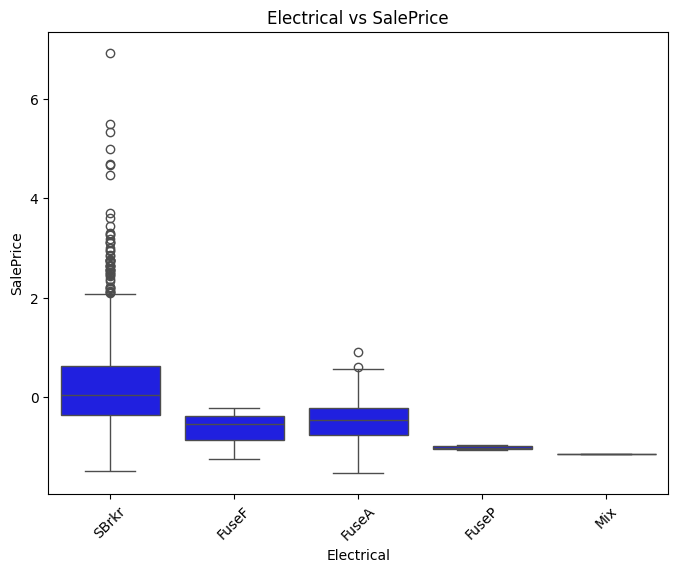

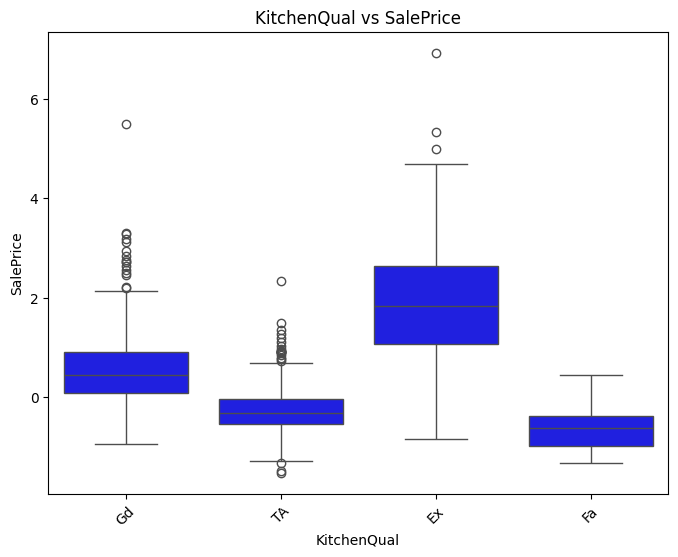

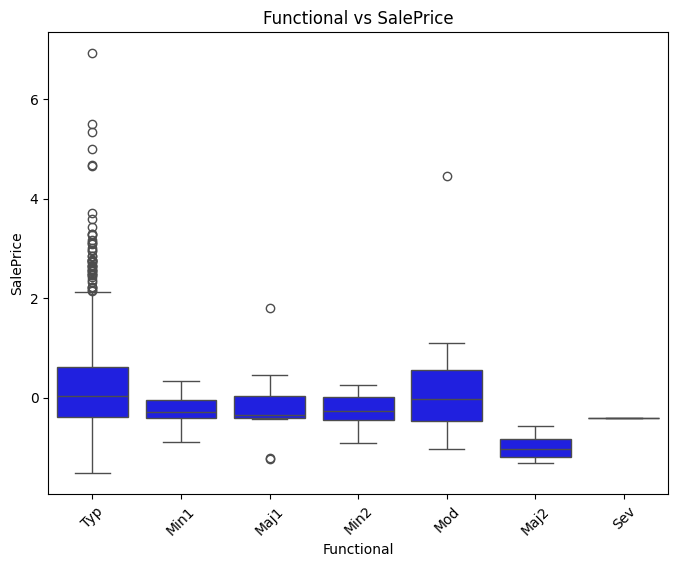

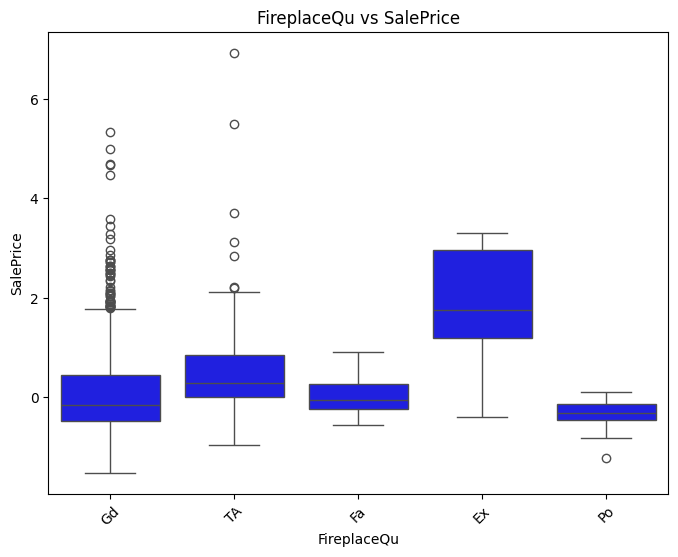

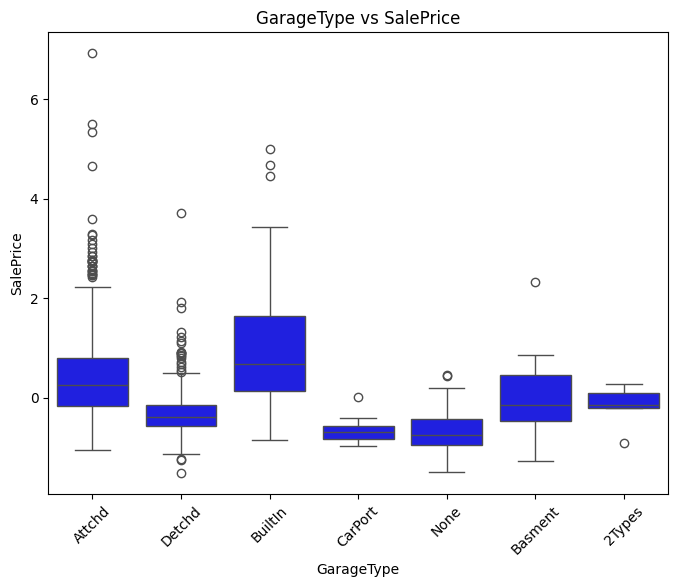

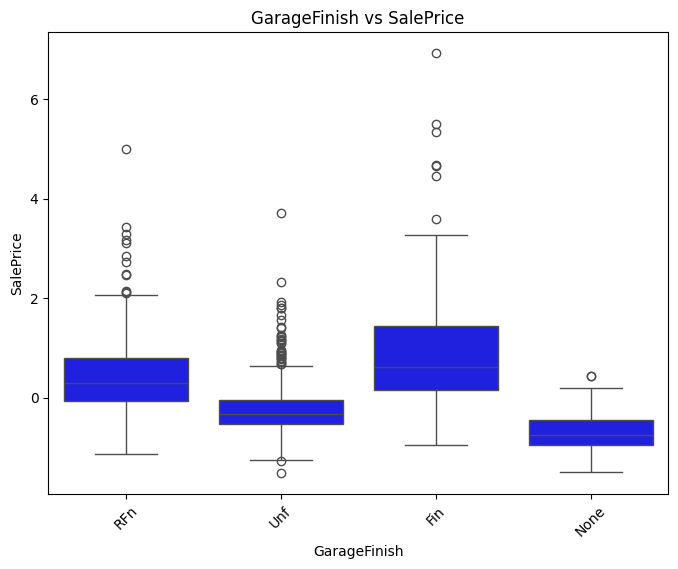

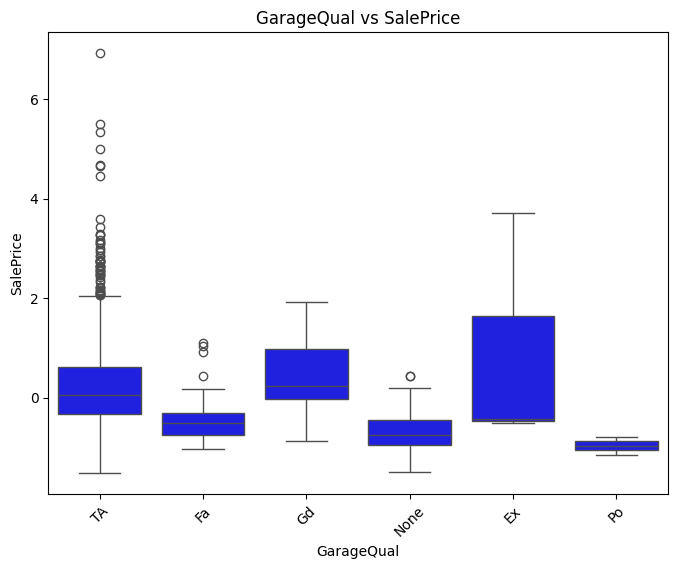

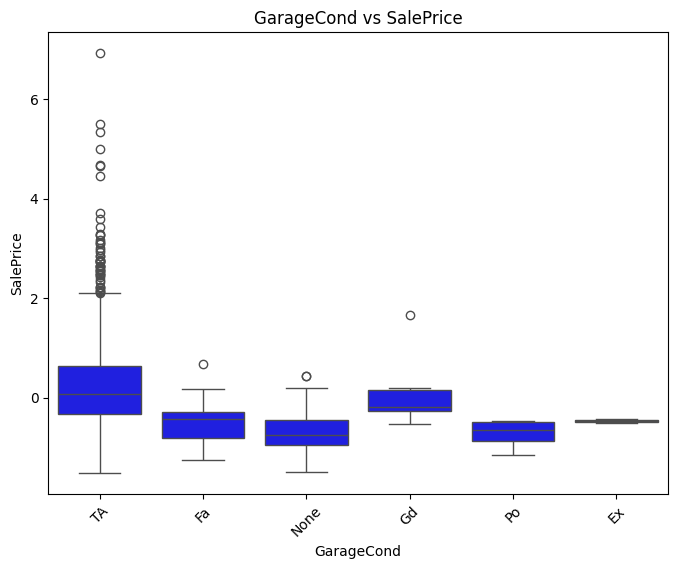

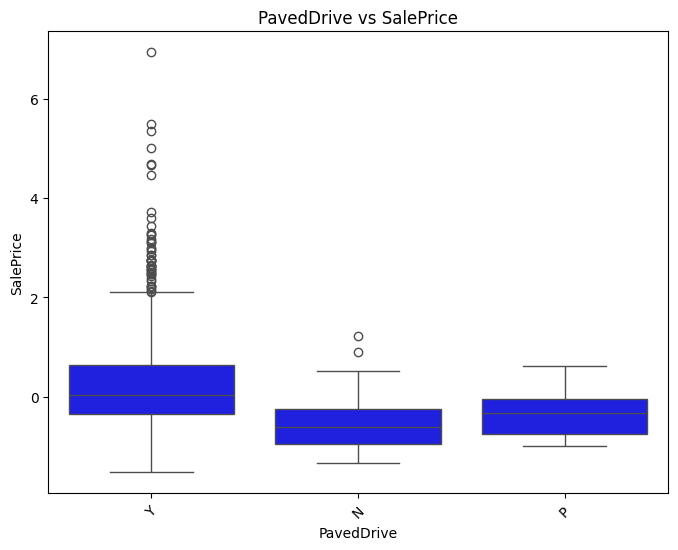

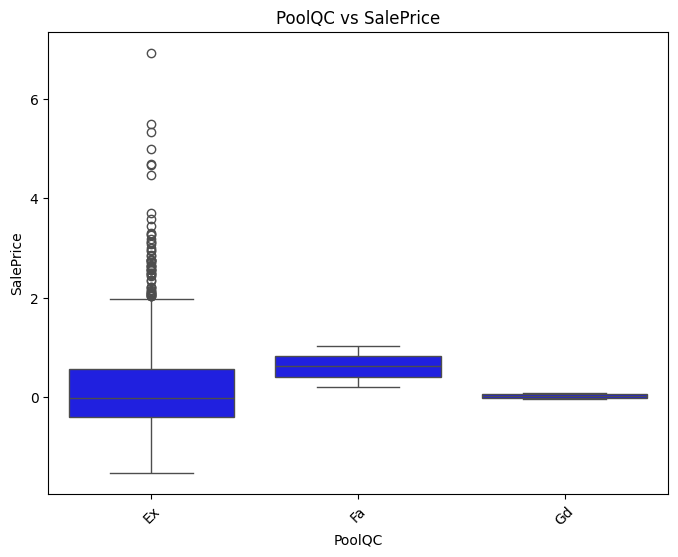

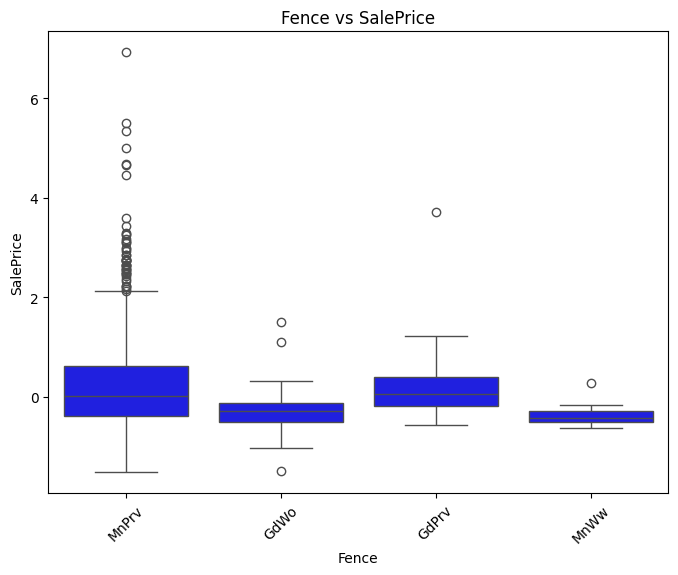

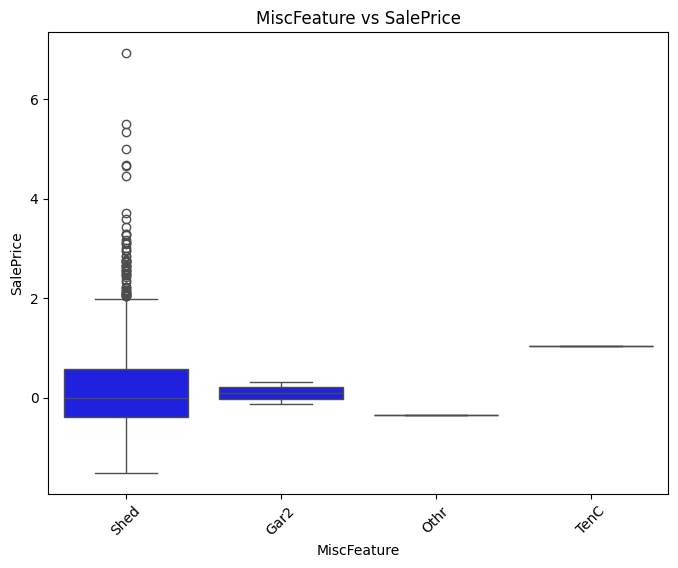

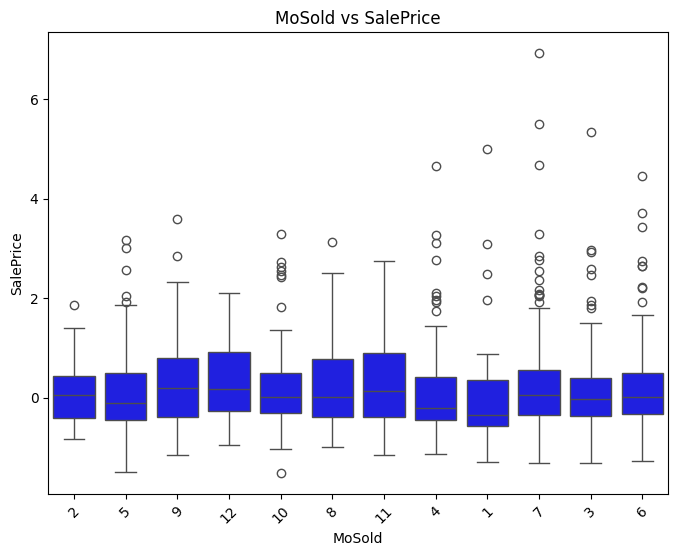

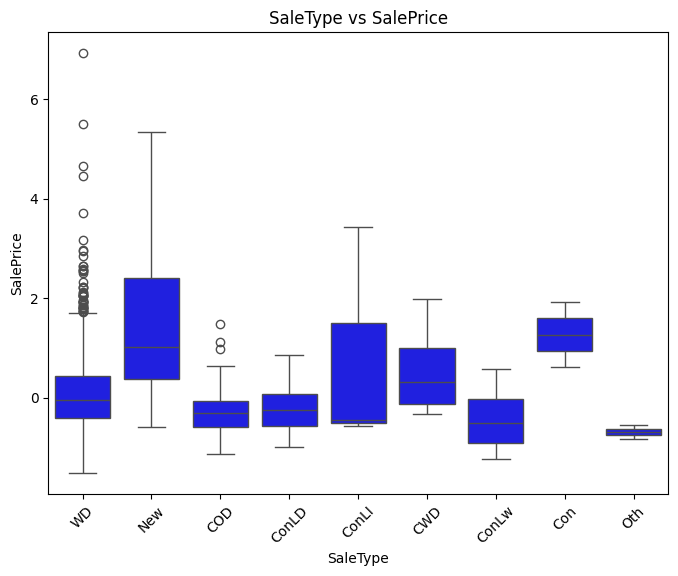

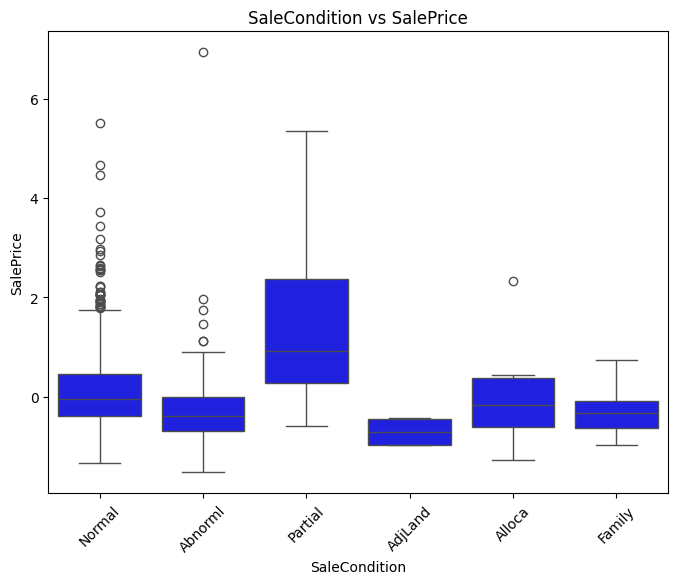

In [221]:
for feature in categorical_features:
  plt.figure(figsize = (8,6))
  sns.boxplot(x = df_total[feature][:ntrain], y = y_train,color = 'blue')
  plt.title(f"{feature} vs SalePrice")
  plt.xlabel(feature)
  plt.ylabel("SalePrice")
  plt.xticks(rotation = 45)
  plt.show()

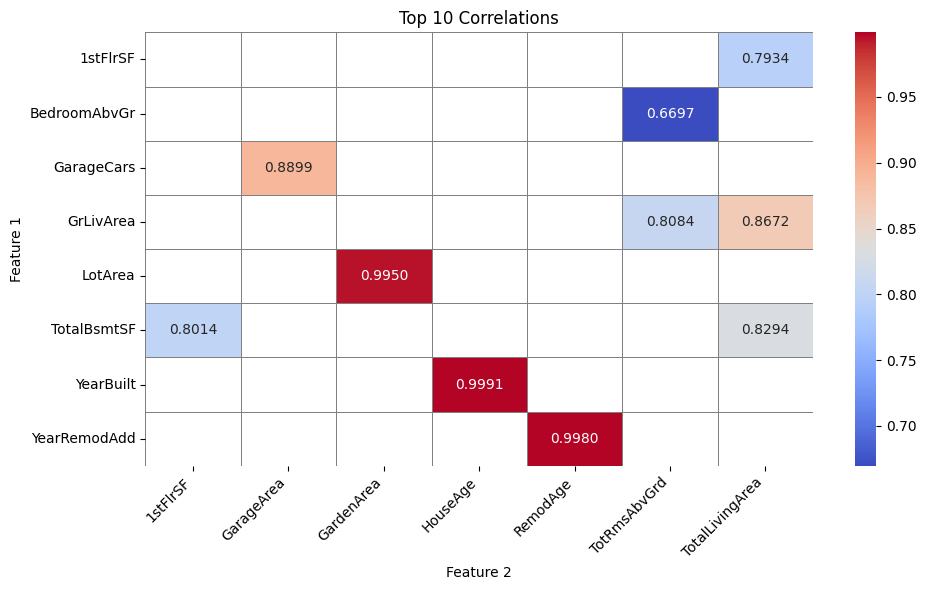

In [222]:
df_numeric = df_total.select_dtypes(include = [np.number])

corr = df_numeric.corr()

mask = np.triu(np.ones(corr.shape),k=1)
corr_masked = corr.where(mask == 0)

corr_masked = corr_masked[corr_masked!=1.0]

top_10_corr = (corr_masked.unstack().dropna().abs().sort_values(ascending=False).head(10))

top_10_corr_df = top_10_corr.reset_index()
top_10_corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

corr_matrix = top_10_corr_df.pivot(index='Feature 1', columns='Feature 2', values='Correlation')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',cbar=True,fmt='.4f',linewidths=0.5,linecolor='gray')
plt.title('Top 10 Correlations')
plt.xticks(rotation=45,ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Encoding and Scaling**

In [223]:
from sklearn.preprocessing import LabelEncoder,RobustScaler

In [224]:
label_encoder = LabelEncoder()
categorical_cols = df_total.select_dtypes(include = ['object','category']).columns
for col in categorical_cols:
  df_total[col] = label_encoder.fit_transform(df_total[col])

numerical_cols = df_total.select_dtypes(include = [np.number]).columns
scaler_robust = RobustScaler()
df_total[numerical_cols] = scaler_robust.fit_transform(df_total[numerical_cols])

X and y List

In [225]:
X = df_total.drop(columns = 'SalePrice',axis = 1)
Y = df_total['SalePrice']

In [231]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

**Split Back into Train and Test**

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Model Building**

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
lm = LinearRegression()

In [236]:
lm.fit(X_train,Y_train)

LinearRegression()

In [237]:
print(lm.intercept_)

0.37949002361695827


In [239]:
coeff_df = pd.DataFrame(lm.coef_, df_total.drop(columns = 'SalePrice',axis = 1).columns, columns=['Coefficient'])
coeff_df

Coefficient
MSSubClass         -0.077349
MSZoning           -0.076295
LotFrontage        -0.024148
LotArea             0.096000
Street              0.271620
...                      ...
SaleCondition       0.055487
TotalLivingArea     0.254743
HouseAge           -0.095366
RemodAge           -0.016221
GardenArea          0.040049

[82 rows x 1 columns]

Predictions from our Linear Regression Model

In [240]:
predictions = lm.predict(X_test)

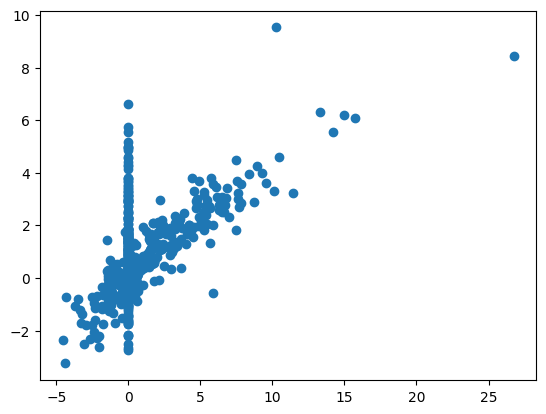

In [241]:
plt.scatter(Y_test,predictions)

<Axes: xlabel='SalePrice', ylabel='Density'>

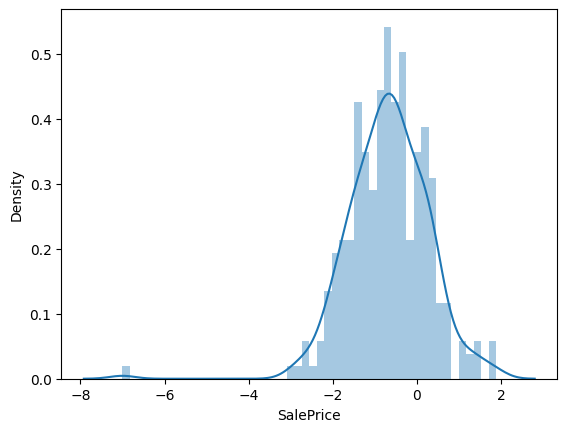

In [242]:
sns.distplot((y_test - predictions),bins = 50)

Regression Evaluation Metrics

In [243]:
from sklearn import metrics

In [244]:
print("MAE:",metrics.mean_absolute_error(Y_test,predictions))
print("MSE:",metrics.mean_squared_error(Y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE: 1.4372005762636926
MSE: 4.6438490677652
RMSE: 2.154959180069358
